## 1. Data wrangling

## 1.1 Contents<a id='2.1_Contents'></a>
* [1 Data wrangling](#2_Data_wrangling)
  * [1.1 Contents](#2.1_Contents)
  * [1.2 Introduction](#2.2_Introduction)
  * [1.3 Imports](#2.3_Imports)
  * [1.4 Load The House Price Data](#2.4_Load_The_House_Price_Data)
  * [1.5 Filtering Single Family Property Type](#2.5_Filtering_Single_Family_Property_Type) 
  * [1.6 Missing Values](#2.6_Missing_Values) 
    * [1.6.1 Features With > 90% Missing Values](#1.6.1_Features_With_>90%_Missing_Values)
    * [1.6.2 Features With 80%-90% Missing Values](#1.6.2_Features_With_80%_-_90%_Missing_Values)
    * [1.6.3 Features With 70%-80% Missing Values](#1.6.3_Features_With_70%_-_80%_Missing_Values)
    * [1.6.4 Features With 50%-70% Missing Values](#1.6.4_Features_With_50%_-_70%_Missing_Values)
    * [1.6.5 Features With 10%-50% Missing Values](#1.6.5_Features_With_10%_-_50%_Missing_Values)
      * [1.6.5.1 Garage](#1.6.5.1_Garage)
      * [1.6.5.2 Living](#1.6.5.2_Living) 
      * [1.6.5.3 Dining](#1.6.5.3_Dining) 
      * [1.6.5.4 Kitchen](#1.6.5.4_Kitchen)
  * [1.7 Subdivisions And Their Facts](#1.7_Subdivisions_And_their_Facts)
  * [1.8 Fill Null For Kitchen, Dining and Living](#1.8_Fill_Null_For_Kitchen_Dining_Living)
  * [1.9 Listing Price](#1.9_Listing_Price)
  * [1.10 Bedrooms](#1.10_Bedrooms)     
  * [1.11 Bathrooms](#1.11_Bathrooms)
  * [1.12 Stories](#1.12_Stories)
  * [1.13 Style](#1.13_Style)
  * [1.14 Year Built](#1.14_Year_Built)
  * [1.15 Building Sqft](#1.15_Building_Sqft)
  * [1.16 Lot Size](#1.16_Lot_Size)
  * [1.17 Maintenance Fee](#1.17_Maintenance_Fee)
  * [1.18 Fireplace](#1.18_Fireplace)
  * [1.19 HOA Mandatory](#1.19_HOA_Mandatory)
  * [1.20 Other Fees](#1.20_Other_Fees)
  * [1.21 Roof](#1.21_Roof)

## 2.2 Introduction<a id='2.2_Introduction'></a>

In this section I will investigate data scrapped from www.HAR.com. Data cleaning will be done in this stage since all rows are categorical and need to be numerical. I will remove features with lost of none values and will create new features.

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import substring
import os
import re
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore')

## 2.4 Load The House Price Data<a id='2.4_Load_The_House_Price_Data'></a>

In [126]:
data= pd.read_csv('../data/raw/Houston_Home_List.csv',encoding = "ISO-8859-1")
print('data shape is:',data.shape)

data shape is: (15065, 101)


In [127]:
data.columns

Index(['Unnamed: 0', 'image_link', 'Listing Price:', 'Address:', 'City:',
       'State:', 'Zip Code:', 'County:', 'Subdivision:', 'Legal Description:',
       ...
       'Extra Room:', 'Wine Room:', 'Carport Description:',
       'Median Appraised Value / Square ft.:', 'Den:', 'Utility Room Desc:',
       'Sunroom:', 'Guest Suite:', 'Bath:', 'Garage Apartment:'],
      dtype='object', length=101)

## 2.5 Filtering Single Family Property Type<a id='2.5_Filtering_Single_Family_Property_Type'></a>

Since we are going to analysis images and other house features it is important to have all records as same as possible. For example for lots there is no image for building or rooms and features for multi-family properties are different from single family homes. let see what kind of property type we have in our dataset:

In [128]:
data['Property Type:'].value_counts()

Single-Family                          11034
Lots                                    1591
Townhouse/Condo - Townhouse              966
Townhouse/Condo - Condominium            600
Mid/Hi-Rise Condo                        444
Country Homes/Acreage                    146
Multi-Family - Duplex                    117
Country Homes/Acreage - Free Standi       47
Multi-Family - Fourplex                   40
Multi-Family - 5 Plus                     37
Multi-Family - Triplex                    18
Multi-Family - Multiple Detached Dw       12
Lot & Acreage - Residential                5
Country Homes/Acreage - Manufacture        2
Residential - Condo                        2
Residential - Townhouse                    1
Single Family                              1
Name: Property Type:, dtype: int64

Majority of properties are single family so, I keep them and remove the rest of the types.

In [129]:
single_family_df = data[data['Property Type:']=='Single-Family']
single_family_df.reset_index(drop=True,inplace=True)
len(single_family_df)

11034

In [130]:
single_family_df.head()

,Unnamed: 0,image_link,Listing Price:,Address:,City:,State:,Zip Code:,County:,Subdivision:,Legal Description:,...,Extra Room:,Wine Room:,Carport Description:,Median Appraised Value / Square ft.:,Den:,Utility Room Desc:,Sunroom:,Guest Suite:,Bath:,Garage Apartment:
0,0,['https://photos.harstatic.com/190420550/hr/im...,"$ 465,000 ($221.85/sqft.) $Convert",110 Pierce Street,Houston,TX,77002,Harris County,Modern Midtown (View subdivision price trend),LT 12 BLK 1 MODERN MIDTOWN,...,NaN,NaN,NaN,$223.83,NaN,NaN,NaN,NaN,NaN,NaN
1,2,['https://photos.harstatic.com/190088153/hr/im...,"$ 450,000 ($223.33/sqft.) $Convert",118 Pierce Street,Houston,TX,77002,Harris County,Modern Midtown (View subdivision price trend),LT 8 BLK 1 MODERN MIDTOWN,...,NaN,NaN,NaN,$223.83,NaN,NaN,NaN,NaN,NaN,NaN
2,105,['https://photos.harstatic.com/190618667/hr/im...,"$ 575,000 ($232.98/sqft.) $Convert",1316 Hadley Street,Houston,TX,77002,Harris County,Austin Hadley Place,LT 4 BLK 1 AUSTIN HADLEY PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109,['https://photos.harstatic.com/191391009/hr/im...,"$ 514,900 ($208.88/sqft.) $Convert",2751 Freund Street,Houston,TX,77003,Harris County,EAST END ON THE BAYOU (View subdivision price...,Lot 9 of EAST END ON THE BAYOU SEC 3,...,"['8 x 5, 3rd', '8 , 5, 3rd']",NaN,NaN,$196.51,NaN,NaN,NaN,NaN,"['5 x 9, 3rd', '5 x 8, 4th', '5 x 8, 1st', '5 ...",NaN
4,110,['https://photos.harstatic.com/185138271/hr/im...,"$ 514,900 ($208.88/sqft.) $Convert",2765 Freund Street,Houston,TX,77003,Harris County,EAST END ON THE BAYOU (View subdivision price...,Lot 15 of EAST END ON THE BAYOU SEC 3,...,"['8 x 5, 3rd', '8 , 5, 3rd']",NaN,NaN,$196.51,NaN,NaN,NaN,NaN,"['5 x 9, 3rd', '5 x 8, 4th', '5 x 8, 1st', '5 ...",NaN


In our dataset `State` and `Property Type` are the same for all houses so, we can remove them:

In [131]:
single_family_df.drop(['Unnamed: 0','State:','Property Type:'],axis=1,inplace=True)

## 2.6 Missing Values<a id='2.6_Missing_Values'></a>

In [132]:
# function to find missing value and returning count abd %
def missing_cal(df):
    """This function calculates missing value 
    for datafaram passed in as parameter"""
    missing = pd.concat([single_family_df.isnull().sum(), 100 * single_family_df.isnull().mean()], axis=1)
    missing.columns=['count', '%']
    missing.sort_values(by='count',ascending=False)
    return missing

In [133]:
missing = missing_cal(single_family_df)
missing

,count,%
image_link,0,0.000000
Listing Price:,3,0.027189
Address:,0,0.000000
City:,0,0.000000
Zip Code:,0,0.000000
...,...,...
Utility Room Desc:,7144,64.745333
Sunroom:,10805,97.924597
Guest Suite:,10902,98.803698
Bath:,9361,84.837774


## 1.6.1 Features With >90% Missing Values<a id='1.6.1_Features_With_>90%_Missing_Values'></a>

Let's take a look at features with more than 90% missing values: 

In [134]:
missing = missing_cal(single_family_df)
nan_90 = missing.loc[missing['%']>90].index
print('Number of Features with more than 90% None: ',len(nan_90))

Number of Features with more than 90% None:  9


In [135]:
missing.loc[nan_90].sort_values(by="%")

,count,%
Extra Room:,9980,90.447707
Median Appraised Value / Square ft.:,10056,91.136487
Media Room:,10075,91.308682
Carport Description:,10446,94.671017
Water Amenity:,10609,96.148269
Garage Apartment:,10732,97.263005
Sunroom:,10805,97.924597
Wine Room:,10897,98.758383
Guest Suite:,10902,98.803698


We need to see what kind of information are in each of these features:

In [136]:
for item in nan_90:
    print('Value Count for '+item)
    print(single_family_df[item].value_counts())
    print('-'*100)

Value Count for Media Room:
['2nd', '2nd']                      30
['13x15, 2nd', '3.96 x 4.57(m)']    16
['14x13, 2nd', '4.27 x 3.96(m)']    15
['16x12, 2nd', '4.88 x 3.66(m)']    15
['15x13, 2nd', '4.57 x 3.96(m)']    14
                                    ..
['16X16, 2nd', '4.88 x 4.88(m)']     1
['18 X 15, 2nd', '18 , 15, 2nd']     1
['13X16, 2nd', '3.96 x 4.88(m)']     1
['11X14, 2nd', '3.35 x 4.27(m)']     1
['12X17, 2nd', '3.66 x 5.18(m)']     1
Name: Media Room:, Length: 463, dtype: int64
----------------------------------------------------------------------------------------------------
Value Count for Water Amenity:
Lake View                                                     127
Lake View, Lakefront                                           99
Lakefront                                                      56
Pond                                                           55
Bayou View                                                     10
Bayou Frontage, Bayou View          

* Values for `Media Room`, `Extra Room`, `Wine Room`, `Sunroom`, `Guest Suite`and `Garage Apartment` are kind of dimension of each of those rooms along with some nonsense values like (`Yes` for `Garage Apartment`). 
* For `Water Amenity` there are to much unique categories and there is no way to be able to fill rest of none values with correct category
* `Carport Description` has 3 different categories for total 611 house and the rest do not have any carport so I will fill  all none values with new category as 'Not Applicable'.
* `Median Appraised Value / Square ft.:` is the fact (based on active listing) for each subdivision and can be fill by the value for same subdivision.

In [137]:
# Replacing None value for 'Carport Description:' with 'not applicable'
single_family_df['Carport Description:'][single_family_df['Carport Description:'].isnull()]='not applicable'

# Dropping 'Media Room:', 'Water Amenity:', 'Extra Room:', 'Wine Room:', 
#'Sunroom:', 'Guest Suite:', 'Garage Apartment:', 'Vacation Rental:'
single_family_df.drop(['Media Room:', 'Water Amenity:', 'Extra Room:', 'Wine Room:', 'Sunroom:', 'Guest Suite:', 
                       'Garage Apartment:'],axis=1,inplace=True)

## 1.6.2 Features With 80%-90% Missing Values<a id='1.6.2_Features_With_80%_-_90%_Missing_Values'></a>

Next step is looking at the features with more than 80% none values:

In [138]:
missing = missing_cal(single_family_df)
nan_80 = missing.loc[missing['%']>80].index
print('Number of Features with more than 80% None: ',len(nan_80))

Number of Features with more than 80% None:  14


In [139]:
missing.loc[nan_80].sort_values(by="%")

,count,%
Average Square Ft.:,9281,84.112742
Average Price/Square Ft.:,9281,84.112742
Market Area Name:,9282,84.121805
Home For Sales:,9282,84.121805
Average List Price:,9282,84.121805
Home For Lease:,9282,84.121805
Average Lease/Square Ft.:,9282,84.121805
Average Lease:,9283,84.130868
Bath:,9361,84.837774
Den:,9472,85.843756


In [140]:
#printing value count for each feature with more than 80 none value
for item in nan_80:
    print('Value Count for '+item)
    print(single_family_df[item].value_counts())
    print('-'*100)

Value Count for Private Pool Desc:
In Ground                                    357
Gunite, In Ground                            328
Gunite, Heated, In Ground                    229
Gunite                                       200
Heated, In Ground                            103
Gunite, Heated, In Ground, Salt Water         45
Gunite, Heated                                42
Above Ground                                  30
Heated, In Ground, Salt Water                 25
Gunite, In Ground, Salt Water                 18
In Ground, Salt Water                         17
Gunite, Salt Water                            10
Gunite, Heated, Salt Water                     8
Enclosed, Heated, In Ground                    6
In Ground, Vinyl Lined                         5
Heated                                         4
Heated, Salt Water                             3
Fiberglass                                     3
Salt Water                                     2
Fiberglass, Salt Water            

* `Controlled Access`categories are mixed  of 'Automatic', 'Driveway', 'Manned' and 'Intercom' that makes me believe the rest of the house do not have any type of controlled access. I think filling none values with 'No controlled access' would be reasonable.
* Same as `Water Amenity` there are so many categories for 'Private Pool Desc'. After counting each category for `Private Pool:` groups figured out that there are description for house without private pool and I think it may happened by mistake and I decided to drop this column.
* `Master Planned Community` and `Market Area Name` categories seems to be same as subdivision name and we will deal with them later on subdivision section
* `Home For Sales`, `Average List Price`,`Average Square Ft.`,`Average Price/Square Ft.`, `Home For Lease`, `Average Lease`and `Average Lease/Square Ft.`, are the facts (based on active listing) for each subdivision and can be fill by the value for same subdivision.
* `Den` and `Bath` are dimension along with other values like '1th' which I think is typo mistake and I decided to drop them.

In [141]:
#counting 'Private Pool Desc:' category for `Private Pool:` groups
single_family_df.groupby('Private Pool:')['Private Pool Desc:'].value_counts()

Private Pool:  Private Pool Desc:                       
No             In Ground                                     12
               Above Ground                                   5
               Enclosed, Heated, In Ground                    5
               Heated, In Ground                              4
               Gunite                                         3
               Gunite, In Ground                              2
               Fiberglass                                     1
               Gunite, Heated, In Ground                      1
               Gunite, Heated, In Ground, Salt Water          1
Yes            In Ground                                    345
               Gunite, In Ground                            326
               Gunite, Heated, In Ground                    228
               Gunite                                       197
               Heated, In Ground                             99
               Gunite, Heated, In Ground, Salt 

In [142]:
single_family_df.drop(['Private Pool Desc:','Bath:','Den:'],axis=1,inplace=True)
# Replacing None value for 'Carport Description:' with 'not applicable'
single_family_df['Controlled Access:'][single_family_df['Controlled Access:'].isnull()]='no controlled access'

## 1.6.3 Features With 70%-80% Missing Values<a id='1.6.3_Features_With_70%_-_80%_Missing_Values'></a>

Now I investigating features with more than 70% none values:

In [143]:
missing = missing_cal(single_family_df)
nan_70 = missing.loc[((missing['%']>70 )& (missing['%']<80))].index
print('Number of Features with more than 70% None: ',len(nan_70))

Number of Features with more than 70% None:  2


In [144]:
missing.loc[nan_70].sort_values(by="%")

,count,%
Family Room:,7729,70.047127
Primary Bath:,8276,75.004531


In [145]:
#printing value count for each feature with more than 70 none value
for item in nan_70:
    print('Value Count for '+item)
    print(single_family_df[item].value_counts())
    print('-'*100)

Value Count for Family Room:
['1st', '1st']                       78
['18x16, 1st', '5.49 x 4.88(m)']     46
['20x17, 1st', '6.10 x 5.18(m)']     44
['21x17, 1st', '6.40 x 5.18(m)']     42
['19x18, 1st', '5.79 x 5.49(m)']     40
                                     ..
['35X14, 2nd', '10.67 x 4.27(m)']     1
['27X18, 1st', '8.23 x 5.49(m)']      1
['28X18, 1st', '8.53 x 5.49(m)']      1
['22 X 19, 1st', '22 , 19, 1st']      1
['28x25, 1st', '8.53 x 7.62(m)']      1
Name: Family Room:, Length: 919, dtype: int64
----------------------------------------------------------------------------------------------------
Value Count for Primary Bath:
['1st', '1st']                      742
['2nd', '2nd']                      304
['3rd', '3rd']                      109
['12x10, 1st', '3.66 x 3.05(m)']     25
['12x7, 1st', '3.66 x 2.13(m)']      19
                                   ... 
['25x11, 1st', '7.62 x 3.35(m)']      1
['12x20, 1st', '3.66 x 6.10(m)']      1
['11 x 5, 2nd', '11 , 5, 2nd']    

`Family Room` and `Primary Bath` are dimension for family room and master bath room and all houses should have these values and can not be 0. I think dropping these features would be appropriate since I can not fill values for more than 70% of houses.

In [146]:
single_family_df.drop(['Family Room:','Primary Bath:'],axis=1,inplace=True)

## 1.6.4 Features With 50%-70% Missing Values<a id='1.6.4_Features_With_50%_-_70%_Missing_Values'></a>

Next step is to look at features with none values between 50% and 70%:

In [147]:
missing = missing_cal(single_family_df)
nan_50_70 = missing.loc[((missing['%']>50 )& (missing['%']<70))].index
print('Number of Features with more than 50% and less than 70% None: ',len(nan_50_70))

Number of Features with more than 50% and less than 70% None:  6


In [148]:
missing.loc[nan_50_70].sort_values(by="%")

,count,%
Front Door:,6461,58.555374
Breakfast:,6651,60.277325
Garage Carport:,6675,60.494834
Utility Room Desc:,7144,64.745333
Game Room:,7224,65.470364
Study/Library:,7588,68.769259


In [149]:
#printing value count for each feature with more than 50 none value
for item in nan_50_70:
    print('Value Count for '+item)
    print(single_family_df[item].value_counts())
    print('-'*100)

Value Count for Breakfast:
['1st', '1st']                              188
['11x10, 1st', '3.35 x 3.05(m)']            155
['10x10, 1st', '3.05 x 3.05(m)']            142
['12x10, 1st', '3.66 x 3.05(m)']            135
['10x9, 1st', '3.05 x 2.74(m)']             103
                                           ... 
['13.5x9.5, 1st', '4.11 x 2.90(m)']           1
['16\'8"x10\', 1st', '16\'8",10\', 1st']      1
['13X7, 1st', '3.96 x 2.13(m)']               1
['15 x 9, 1st', '15 , 9, 1st']                1
['11.5 x 9, 1st', '11.5 , 9, 1st']            1
Name: Breakfast:, Length: 730, dtype: int64
----------------------------------------------------------------------------------------------------
Value Count for Game Room:
['2nd', '2nd']                        67
['18x14, 2nd', '5.49 x 4.27(m)']      49
['19x16, 2nd', '5.79 x 4.88(m)']      46
['19x15, 2nd', '5.79 x 4.57(m)']      42
['16x14, 2nd', '4.88 x 4.27(m)']      41
                                      ..
["18'x16', 2nd", "18',16', 

We can calculate area for `Utility Room`, `Study/Library`. `Game Room`and `Breakfast` based on  dimension we have and assume the NA values are zero for those houses that do not have these rooms. I drop `Garage Carport` and `Front Door` since there is no information for rest of the house.

In [150]:
def area_calc(item,pattern = "([\d.]+)(?:.*?([\d]+))?.*?[x|*].*?([\d]+)(?:.*?([\d.]+))?"):
    """This function calculates are based on dimension passed in as parameter. Regular experession
    pattern will find dimension and group them as feet and inch"""
    pattern = re.compile(pattern,re.IGNORECASE)
    area=0
    dim=[]
    if type(item)==list:
        for i in item:
            if (('x' in i or 'X' in i or '*' in i )and '(m)' not in i ):
                dim.append(i.replace('[','').strip())
        for d in dim:
            d=d.replace(' ','').strip()
            match=pattern.findall(d)
            try:
                dimension_list = [float(item) if len(item)>0 else 0 for item in match[0]]
                area += (dimension_list[0]+(dimension_list[1]/12))*(dimension_list[2]+(dimension_list[3]/12))
            except:
                area=None
        return(area)

In [151]:
# Calculating area for Utility room
single_family_df['UtilitySqft'] = single_family_df['Utility Room Desc:'].str.split(',')
single_family_df['UtilitySqft'] = single_family_df['UtilitySqft'].apply(area_calc)

# Calculating area for Study/Library room
single_family_df['StudySqft'] = single_family_df['Study/Library:'].str.split(',')
single_family_df['StudySqft'] = single_family_df['StudySqft'].apply(area_calc)

# Calculating area for Game room
single_family_df['GameSqft'] = single_family_df['Game Room:'].str.split(',')
single_family_df['GameSqft'] = single_family_df['GameSqft'].apply(area_calc)

# Calculating area for Breakfast
single_family_df['BreakfastSqft'] = single_family_df['Breakfast:'].str.split(',')
single_family_df['BreakfastSqft'] = single_family_df['BreakfastSqft'].apply(area_calc)

single_family_df.update(single_family_df[['UtilitySqft','StudySqft','GameSqft','BreakfastSqft']].fillna(0))

In [152]:
single_family_df.drop(list(nan_50_70),axis=1,inplace=True)

So far I investigated features with the none value more than 50% and still need to dig more and also fill values for features that are the facts (based on active listing) for each subdivision like: `Home For Sales`, `Average List Price`,`Average Square Ft.`,`Average Price/Square Ft.`, `Home For Lease`, `Average Lease`and `Average Lease/Square Ft.`. But before that lets take a look at features with none values more than 10%:

## 1.6.5 Features With 10%-50% Missing Values<a id='1.6.5_Features_With_10%_-_50%_Missing_Values'></a>

In [153]:
missing = missing_cal(single_family_df)
nan_10_50 = missing.loc[((missing['%']>10 )& (missing['%']<50))].index
print('Number of Features with more than 10% and less than 50% None: ',len(nan_10_50))

Number of Features with more than 10% and less than 50% None:  35


In [154]:
missing.loc[nan_10_50].sort_values(by="%")

,count,%
Tax Rate:,1288,11.673011
Dishwasher:,1401,12.697118
Bedroom Desc:,1678,15.207540
Garage(s):,1759,15.941635
Median Appraised Value:,1769,16.032264
Median Year Built:,1769,16.032264
Median Lot Square Ft.:,1769,16.032264
Median Square Ft.:,1769,16.032264
Single Family Properties:,1769,16.032264
County / Zip Code:,1769,16.032264


In [155]:
#printing value count for each feature with more than 50 none value
for item in nan_10_50:
    print('Value Count for '+item)
    print(single_family_df[item].value_counts())
    print('-'*100)

Value Count for Garage(s):
2 / Attached                                5211
2 / Detached                                 963
3 / Attached                                 703
1 / Detached                                 352
1 / Attached                                 287
                                            ... 
4 / Detached,Tandem                            1
8 / Attached,Attached/Detached,Oversized       1
4 / Attached,Detached,Oversized                1
4 / Oversized,Tandem                           1
6 / Attached                                   1
Name: Garage(s):, Length: 115, dtype: int64
----------------------------------------------------------------------------------------------------
Value Count for Living:
['1st', '1st']                          177
['18x15, 1st', '5.49 x 4.57(m)']         65
['15x13, 1st', '4.57 x 3.96(m)']         64
['14x12, 1st', '4.27 x 3.66(m)']         55
['15x12, 1st', '4.57 x 3.66(m)']         54
                                       ... 
[

2015.0    331
2018.0    319
2017.0    288
1982.0    283
1940.0    267
         ... 
1931.0      2
1927.0      1
2019.0      1
1922.0      1
1916.0      1
Name: Median Year Built:, Length: 99, dtype: int64
----------------------------------------------------------------------------------------------------
Value Count for Median Appraised Value:
$349,020      115
$571,506       98
$238,290       87
$353,597       84
$234,244       78
             ... 
$234,126        1
$63,515         1
$1,452,000      1
$133,624        1
$111,076        1
Name: Median Appraised Value:, Length: 2150, dtype: int64
----------------------------------------------------------------------------------------------------
Value Count for Neighborhood Value Range:
$279 - $479 K     115
$335 - $1040 K     98
$40 - $345 K       87
$288 - $823 K      84
$152 - $333 K      78
                 ... 
$52 - $136 K        1
$62 - $94 K         1
$740 - $1728 K      1
$307 - $401 K       1
$62 - $922 K        1
Name: Neighbo

`Room Description`, `Countertop`, `Floors`, `Bedroom Desc`, `Kitchen Desc`, `Bathroom Description`, `Connections`, `Oven`, `Range`, `Energy Feature`, `Interior`, `Exterior`, `Financing Considered` are just information and we can not fill them with unknown values since some may not be accurate and I don't think they are relevant to our analysis so, I will drop all of them.
We also do not need `County / Zip Code:` since we do have another column for zip codes.
I could not find any information regarding to `Single Family Properties:` so, this column will be dropped as well.

In [156]:
single_family_df.drop(['Room Description:', 'Countertop:', 'Floors:', 'Bedroom Desc:', 'Kitchen Desc:', 
                       'Bathroom Description:','Connections:', 'Oven:', 'Range:', 'Energy Feature:',
                       'Interior:', 'Exterior:', 'Financing Considered:','Single Family Properties:','County / Zip Code:'], axis=1,inplace=True)

`Ice Maker`, `Microwave`, `Compactor`, `Dishwasher`, `Disposal` and `Area Pool` are 'Yes/No' categories and I think it is relevant to fill none values with 'No'. For sure it is a little bit optimistic since some houses may have those features and owner/agent forgot to fill them but for now filling with 'No' value is the best way to dealing with them.

In [157]:
single_family_df['Disposal:'][single_family_df['Disposal:'].isnull()]='No'
single_family_df['Ice Maker:'][single_family_df['Ice Maker:'].isnull()]='No'
single_family_df['Compactor:'][single_family_df['Compactor:'].isnull()]='No'
single_family_df['Area Pool:'][single_family_df['Area Pool:'].isnull()]='No'
single_family_df['Microwave:'][single_family_df['Microwave:'].isnull()]='No'
single_family_df['Dishwasher:'][single_family_df['Dishwasher:'].isnull()]='No'

At this point I am investigating other features indevisually:

## 1.6.5.1 Garage<a id='1.6.5.1_Garage'></a>

In [158]:
single_family_df['Garage(s):'].value_counts()

2 / Attached                                5211
2 / Detached                                 963
3 / Attached                                 703
1 / Detached                                 352
1 / Attached                                 287
                                            ... 
4 / Detached,Tandem                            1
8 / Attached,Attached/Detached,Oversized       1
4 / Attached,Detached,Oversized                1
4 / Oversized,Tandem                           1
6 / Attached                                   1
Name: Garage(s):, Length: 115, dtype: int64

The important part of this feature is the number of garage each house has. Also we now almost every single family homes have at least 2 garages and it is relevant to fill none values with '2'.

In [159]:
single_family_df['Garage(s):'].fillna('2',inplace=True)
single_family_df['Garage'] = [item[0] if item !=None else 0 for item in single_family_df['Garage(s):'].str.split(' ') ]
single_family_df['Garage']=single_family_df['Garage'].astype(int)
single_family_df.drop('Garage(s):',axis=1,inplace=True)
single_family_df['Garage'].value_counts()

2     8620
3     1439
1      735
4      176
5       19
6       11
8        5
7        4
24       3
40       3
63       2
36       2
10       2
14       1
56       1
22       1
9        1
49       1
60       1
42       1
58       1
27       1
21       1
20       1
28       1
26       1
Name: Garage, dtype: int64

As you can see there are some houses with more than 10 garage which is odd. After checking images for some of these houses in www.HAR.com it seems those have only 2 garage and I fill those values with 2 which is the median of this feature.

In [160]:
single_family_df.Garage[single_family_df['Garage']>7]=single_family_df['Garage'].median()
single_family_df['Garage'].value_counts()

2    8650
3    1439
1     735
4     176
5      19
6      11
7       4
Name: Garage, dtype: int64

## 1.6.5.2 Living<a id='1.6.5.2_Living'></a>

To calculate the living area I use area calculation function, pass in the dimension of the living room and return the area and for the next step I will fill none values with the average of living room area per subdivision

In [161]:
single_family_df['LivingSqft'] = single_family_df['Living:'].str.split(',')
single_family_df['LivingSqft'] = single_family_df['LivingSqft'].apply(area_calc)        

In [162]:
single_family_df['LivingSqft'].describe()

count    6333.000000
mean      281.339938
std       158.494631
min         0.000000
25%       204.000000
50%       272.000000
75%       342.000000
max      6651.000000
Name: LivingSqft, dtype: float64

In [163]:
single_family_df[single_family_df.LivingSqft==0][['LivingSqft','Living:','Address:','Building Sqft.:']]

,LivingSqft,Living:,Address:,Building Sqft.:
20,0.0,"['2nd', '2nd']",619 Live Oak Street,"2,671248(mÂ²) /Appraisal District"
43,0.0,"['2nd', '2nd']",3805 Wilmer Street,"3,640338(mÂ²) /Appraisal District"
63,0.0,"['2nd', '2nd']",15 N Ennis Street,"1,812168(mÂ²) /Appraisal District"
148,0.0,"['2nd', '2nd']",1914 Blodgett Street C,"2,540236(mÂ²) /Appraisal District"
165,0.0,"['2nd', '2nd']",1716 Rosewood Street C,"2,763257(mÂ²) /Builder"
...,...,...,...,...
10674,0.0,"['1st', '1st']",2306 Sledge Street,84078(mÂ²) /Seller
10694,0.0,"['1st', '1st']",15918 Chimney Rock Road,"2,205205(mÂ²) /Appraisal District"
10759,0.0,"['1st', '1st']",6517 Manorwood Drive,"3,630337(mÂ²) /Appraisal District"
10834,0.0,"['1st', '1st']",4622 Shadow Grass Drive,"3,356312(mÂ²) /Appraisal District"


In [164]:
single_family_df.loc[single_family_df['LivingSqft'] == 0, 'LivingSqft'] = np.NAN

In [165]:
single_family_df[single_family_df.LivingSqft>700][['LivingSqft','Living:','Address:','Building Sqft.:']]

,LivingSqft,Living:,Address:,Building Sqft.:
227,750.000000,"['25x30, 1st', '7.62 x 9.14(m)']",3914 Purdue Street,"5,370499(mÂ²) /Builder"
270,750.000000,"['30x25, 1st', '9.14 x 7.62(m)']",2007 Dunstan Road,"3,675341(mÂ²) /Appraisal District"
301,918.000000,"['34x27, 1st', '10.36 x 8.23(m)']",2 Longfellow Lane,"12,8081,190(mÂ²) /Appraisal District"
617,840.000000,"['30 x 28, 2nd', '30 , 28, 2nd']",5341 Larkin Street,"2,379221(mÂ²) /Builder"
865,1696.333333,"['12 1/2 x 14, 1st', '12 1/2 , 14, 1st']",515 W 14th Street,"1,135105(mÂ²) /Appraisal District"
1350,872.000000,"['21x24, 1st', '16x23, 2nd', '6.40 x 7.32(m)',...",931 W 42nd Street,"4,842450(mÂ²) /Appraisal District"
1550,726.000000,"['22 x 33, 2nd', '22 , 33, 2nd']",2025 McDuffie Street,"7,405688(mÂ²) /Appraisal"
1648,900.000000,"['30x30, 1st', '9.14 x 9.14(m)']",9 West Lane,"7,551701(mÂ²) /Appraisal District"
2460,750.000000,"['25x30, 1st', '7.62 x 9.14(m)']",9519 W Airport Boulevard,"1,845171(mÂ²) /Appraisal District"
2483,1533.333333,"['15 3/4 x 10, 1st', '15 3/4 , 10, 1st']",5926 Southville Street,"1,478137(mÂ²) /Seller"


It seems there are some typo mistakes here because living area can not be more than total building Sqft. I am checking HAR.com to see which one has a wrong dimension for living area.

In [166]:
#replacing right area measured
single_family_df.loc[865,'LivingSqft'] = 175
single_family_df.loc[2483,'LivingSqft'] = 157.5
single_family_df.loc[2844,'LivingSqft'] = 363.4
single_family_df.loc[3383,'LivingSqft'] = 126.034
single_family_df.loc[4286,'LivingSqft'] = 286
single_family_df.loc[5796,'LivingSqft'] = 360
single_family_df.loc[7226,'LivingSqft'] = 360

## 1.6.5.3 Dining<a id='1.6.5.3_Dining'></a>

In [167]:
single_family_df['Dining:'].value_counts()

['12x11, 1st', '3.66 x 3.35(m)']                    219
['13x11, 1st', '3.96 x 3.35(m)']                    205
['1st', '1st']                                      188
['14x12, 1st', '4.27 x 3.66(m)']                    182
['13x12, 1st', '3.96 x 3.66(m)']                    162
                                                   ... 
["12'2X14, 2nd", "12'2,14, 2nd"]                      1
['12\'0" x 12\'0", 1st', '12\'0" , 12\'0", 1st']      1
['13x19, 2nd', '3.96 x 5.79(m)']                      1
['11*11, 1st', '11*11, 1st']                          1
['24x16, 1st', '7.32 x 4.88(m)']                      1
Name: Dining:, Length: 1245, dtype: int64

In [168]:
single_family_df['DiningSqft'] = single_family_df['Dining:'].str.split(',')
single_family_df['DiningSqft'] = single_family_df['DiningSqft'].apply(area_calc) 

In [169]:
single_family_df[['Dining:','DiningSqft']].sample(20,random_state=101)

,Dining:,DiningSqft
4697,"['13x10, 1st', '3.96 x 3.05(m)']",130.0
385,"['11x15, 1st', '3.35 x 4.57(m)']",165.0
1250,NaN,NaN
9045,"['14 x 12, 1st', '14 , 12, 1st']",168.0
2246,NaN,NaN
3439,NaN,NaN
6780,"['17x11, 1st', '5.18 x 3.35(m)']",187.0
6537,NaN,NaN
10689,NaN,NaN
6509,NaN,NaN


In [170]:
single_family_df[single_family_df.DiningSqft==0][['DiningSqft','Dining:','Address:','Building Sqft.:']]

,DiningSqft,Dining:,Address:,Building Sqft.:
43,0.0,"['2nd', '2nd']",3805 Wilmer Street,"3,640338(mÂ²) /Appraisal District"
53,0.0,"['2nd', '2nd']",448 N Live Oak Street,"1,910177(mÂ²) /Appraisal"
299,0.0,"['1st', '1st']",2225 Bolsover Street,"4,546422(mÂ²) /Appraisal District"
495,0.0,"['2nd', '2nd']",1626 A Dunlavy st Street,"2,723253(mÂ²) /Appraisal District"
532,0.0,"['1st', '1st']",530 Oxford Street,"3,067285(mÂ²) /Appraisal District"
...,...,...,...,...
10704,0.0,"['1st', '1st']",2022 GLEN PARK Drive,"2,356219(mÂ²) /Appraisal District"
10744,0.0,"['1st', '1st']",7411 Palmetto Springs Trail,"5,646525(mÂ²) /Builder"
10759,0.0,"['1st', '1st']",6517 Manorwood Drive,"3,630337(mÂ²) /Appraisal District"
10840,0.0,"['1st', '1st']",2814 Crawford,"4,687435(mÂ²) /Appraisal District"


In [171]:
single_family_df.loc[single_family_df['DiningSqft'] == 0, 'DiningSqft'] = np.NAN

In [172]:
single_family_df[single_family_df.DiningSqft>500][['DiningSqft','Dining:','Address:','Building Sqft.:']]

,DiningSqft,Dining:,Address:,Building Sqft.:
865,12520.555556,"['12 1/2 x 10 3/4, 1st', '12 1/2 , 10 3/4, 1st']",515 W 14th Street,"1,135105(mÂ²) /Appraisal District"
2324,1200.000000,"['30x20, 1st', '30x20, 1st', '9.14 x 6.10(m)',...",3429 Ella Lee Lane,"4,741440(mÂ²) /Appraisal District"
3471,655.590000,"['23.4 x 14.10, 1st', '23.4 x 14.10, 1st', '23...",5113 Itiel Street,"1,498139(mÂ²) /Builder"
3693,504.000000,"['18x14, Formal, 1st,', '18x14, Formal, 1st,']",5360 Spring Park Street,"5,140478(mÂ²) /Appraisal District"
4957,528.000000,"['24X22, 1st', '7.32 x 6.71(m)']",9303 Bintliff Drive,"1,837171(mÂ²) /Appraisal District"
5103,1456.000000,"['13X112, 1st', '3.96 x 34.14(m)']",1319 Mission Chase Drive,"2,388222(mÂ²) /Appraisal District"
6825,1200.000000,"['12x100, 1st', '3.66 x 30.48(m)']",10723 Braewick Drive,"2,068192(mÂ²) /Appraisal District"
7326,504.000000,"['28x18, 1st', '8.53 x 5.49(m)']",10 Magnolia Woods Drive,"12,7081,181(mÂ²) /Appraisal District"
9566,576.000000,"['18x16, 1st', '18x16, 1st', '5.49 x 4.88(m)',...",13606 Leon Springs Lane,"4,833449(mÂ²) /Builder"
10681,1817.500000,"['12 1/2 X 15, 1st', '12 1/2 , 15, 1st']",29200 Clydesdale Drive,"2,700251(mÂ²) /Builder"


Same as living area there are some mistake for dimension which need to be fixed.

In [173]:
single_family_df.loc[865,'DiningSqft'] = 134.375
single_family_df.loc[3471,'DiningSqft'] = 329.94
single_family_df.loc[5103,'DiningSqft'] = 143
single_family_df.loc[6825,'DiningSqft'] = 120
single_family_df.loc[10681,'DiningSqft'] = 187.5
single_family_df.loc[10691,'DiningSqft'] = 165
single_family_df.loc[10911,'DiningSqft'] = 208

## 1.6.5.4 Kitchen<a id='1.6.5.4_Kitchen'></a>

I am using same function to calculate kitchen are in sqft.

In [174]:
single_family_df['KitchenSqft'] = single_family_df['Kitchen:'].str.split(',')
single_family_df['KitchenSqft'] = single_family_df['KitchenSqft'].apply(area_calc) 

In [175]:
single_family_df[['Kitchen:','KitchenSqft']].sample(20,random_state=101)

,Kitchen:,KitchenSqft
4697,"['10x10, 1st', '3.05 x 3.05(m)']",100.0
385,"['10x15, 1st', '3.05 x 4.57(m)']",150.0
1250,"['14x8, 1st', '4.27 x 2.44(m)']",112.0
9045,"['18 x 10, 1st', '18 , 10, 1st']",180.0
2246,NaN,NaN
3439,NaN,NaN
6780,"['12x11, 1st', '3.66 x 3.35(m)']",132.0
6537,"['15x13, 1st', '4.57 x 3.96(m)']",195.0
10689,NaN,NaN
6509,"['12x6, 1st', '3.66 x 1.83(m)']",72.0


In [176]:
single_family_df[single_family_df.KitchenSqft==0][['KitchenSqft','Kitchen:','Address:','Building Sqft.:']]

,KitchenSqft,Kitchen:,Address:,Building Sqft.:
20,0.0,"['2nd', '2nd']",619 Live Oak Street,"2,671248(mÂ²) /Appraisal District"
43,0.0,"['2nd', '2nd']",3805 Wilmer Street,"3,640338(mÂ²) /Appraisal District"
63,0.0,"['2nd', '2nd']",15 N Ennis Street,"1,812168(mÂ²) /Appraisal District"
299,0.0,"['1st', '1st']",2225 Bolsover Street,"4,546422(mÂ²) /Appraisal District"
345,0.0,"['1st', '1st']",6004 Buffalo Speedway,"2,106196(mÂ²) /Appraisal District"
...,...,...,...,...
10875,0.0,"['1st', '1st']",23606 Sitka Spruce Drive,"3,577332(mÂ²) /Builder"
10877,0.0,"['1st', '1st']",23826 Padauk Tree Trail,"3,577332(mÂ²) /Builder"
10906,0.0,"['1st', '1st']",1815 Rice Mill Drive,"4,058377(mÂ²) /Appraisal District"
10930,0.0,"['1st', '1st']",6343 Winthrop Terrace Trail,"2,541236(mÂ²) /Builder"


In [177]:
single_family_df.loc[single_family_df['KitchenSqft'] == 0, 'KitchenSqft'] = np.NAN

In [178]:
single_family_df[single_family_df.KitchenSqft>500][['KitchenSqft','Kitchen:','Address:','Building Sqft.:']]

,KitchenSqft,Kitchen:,Address:,Building Sqft.:
109,638.000000,"['22x29, 1st', '6.71 x 8.84(m)']",4811 Jackson Street,"4,417410(mÂ²) /Builder"
301,1161.000000,"['43x27, 1st', '13.11 x 8.23(m)']",2 Longfellow Lane,"12,8081,190(mÂ²) /Appraisal District"
304,516.000000,"['21.5 x 24, 1st', '21.5 , 24, 1st']",6335 Belmont Street,"7,275676(mÂ²) /Builder"
311,720.000000,"['36 x 20, 1st', '36 , 20, 1st']",2616 Quenby Avenue,"5,775536(mÂ²) /Appraisal District"
730,3225.000000,"['15x215, 2nd', '4.57 x 65.53(m)']",1115 Herkimer Street,"2,293213(mÂ²) /Appraisal District"
865,1575.166667,"['12 1/2 x 13, 1st', '12 1/2 , 13, 1st']",515 W 14th Street,"1,135105(mÂ²) /Appraisal District"
1014,532.000000,"['28x19, 2nd', '8.53 x 5.79(m)']",713 Booth Street,"5,582519(mÂ²) /Appraisal District"
1350,509.000000,"['19x22, 1st', '7x13, 2nd', '5.79 x 6.71(m)', ...",931 W 42nd Street,"4,842450(mÂ²) /Appraisal District"
2123,600.000000,"['24X25, 1st', '7.32 x 7.62(m)']",3726 N Braeswood Boulevard,"3,800353(mÂ²) /Appraisal District"
2174,600.000000,"['30 X 20, 1st', '30 , 20, 1st']",4059 Grennoch Lane,"5,571518(mÂ²) /Appraisal District"


In [179]:
single_family_df.loc[730,'KitchenSqft'] = 322.5
single_family_df.loc[865,'KitchenSqft'] = 162.5
single_family_df.loc[2483,'KitchenSqft'] = 75
single_family_df.loc[2768,'KitchenSqft'] = 84
single_family_df.loc[4702,'KitchenSqft'] = 140
single_family_df.loc[7757,'KitchenSqft'] = 330
single_family_df.loc[7662,'KitchenSqft'] = 156.8
single_family_df.loc[8224,'KitchenSqft'] = 252
single_family_df.loc[8278,'KitchenSqft'] = 304
single_family_df.loc[9099,'KitchenSqft'] = 203
single_family_df.loc[10483,'KitchenSqft'] = 255
single_family_df.loc[10658,'KitchenSqft'] = 280
single_family_df.loc[10681,'KitchenSqft'] = 175

Now we can drop old living, dining and kitchen columns:

In [180]:
single_family_df.drop(['Living:', 'Dining:', 'Kitchen:'], axis=1,inplace=True)

## 1.7 Subdivisions And Their Facts<a id='1.7_Subdivisions_And_their_Facts'></a>

To uniform subdivision I scraped all subdivision names from HAR.com and will replace names with correct one based on similarity:

In [181]:
sub_df = pd.read_csv('../data/raw/Subdivision.csv')
sub_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [182]:
sub_df.head()

,Subdivision,Zip,Med.Appraisal,Avg.Sqft.,Avg.Yr.Built
0,MARLOWE CONDOS,77002,"$522,701","1,100",2018.0
1,Modern Midtown,77002,"$469,147","2,096",2014.0
2,Midtowne Plaza,77002,"$439,282","2,507",1999.0
3,Macgregor Demerritt,77002,"$438,234","2,034",1930.0
4,Hermann Lofts Condo,77002,"$385,446","1,546",1998.0


As above table shown Med.Appraisal, Avg.Sqft. and Avg.Yr.Built are same for each subdivision and we can fill none values with these numbers for each column.

In [183]:
single_family_df[['Subdivision:','Subdivision Name:','Market Area Name:','Master Planned Community:','Zip Code:']].head()

,Subdivision:,Subdivision Name:,Market Area Name:,Master Planned Community:,Zip Code:
0,Modern Midtown (View subdivision price trend),Modern Midtown,NaN,NaN,77002
1,Modern Midtown (View subdivision price trend),Modern Midtown,NaN,NaN,77002
2,Austin Hadley Place,NaN,Midtown - Houston,NaN,77002
3,EAST END ON THE BAYOU (View subdivision price...,East End On The Bayou,NaN,NaN,77003
4,EAST END ON THE BAYOU (View subdivision price...,East End On The Bayou,NaN,NaN,77003


In [184]:
single_family_df[['Subdivision:','Subdivision Name:','Market Area Name:','Master Planned Community:']].isna().sum()

Subdivision:                    4
Subdivision Name:            1769
Market Area Name:            9282
Master Planned Community:    9626
dtype: int64

It seems all these 4 columns are the same. As we can see `Subdivision` has more clean name and less null values so, I will keep only this column and drop the rest.

In [185]:
single_family_df=single_family_df[~single_family_df['Subdivision:'].isnull()]

In [186]:
single_family_df['Subdivision:'] = single_family_df['Subdivision:'].apply(lambda x: x.lower().split('(')[0].strip())

In [187]:
single_family_df['Subdivision:']

0               modern midtown
1               modern midtown
2          austin hadley place
3        east end on the bayou
4        east end on the bayou
                 ...          
11029            south houston
11030            south houston
11031            south houston
11032     merilyn place sec 02
11033            south houston
Name: Subdivision:, Length: 11030, dtype: object

In [188]:
single_family_df['SubName'] = single_family_df['Subdivision:']

In [189]:
single_family_df['SubName'].isna().sum()

0

In [190]:
single_family_df.drop(['Subdivision Name:','Subdivision:','Market Area Name:','Master Planned Community:'],
                      axis=1,inplace=True)

Now we can take a look at those features related to each subdivision like: `Median Appraised Value:`, `Median Year Built:`, 
`Median Lot Square Ft.:`, `Median Square Ft.:`, `Neighborhood Value Range:`.	

In [191]:
single_family_df[['Median Appraised Value:', 'Median Year Built:', 'Median Lot Square Ft.:', 'Median Square Ft.:', 'Neighborhood Value Range:']].isna().sum()

Median Appraised Value:      1766
Median Year Built:           1766
Median Lot Square Ft.:       1766
Median Square Ft.:           1766
Neighborhood Value Range:    1766
dtype: int64

Those features have same number of missing values and it seems it may because of value missing for some the subdivisions. lets take a look:

In [192]:
single_family_df.SubName.loc[single_family_df['Median Appraised Value:'].isna()].value_counts()

cane island                 55
amira                       52
bauer landing               50
bridgeland                  49
woodland lakes              42
                            ..
arlington columbia court     1
jm everett surv abs 197      1
casper lane estates          1
lakes/mason pk sec 6         1
creole/west main             1
Name: SubName, Length: 556, dtype: int64

In [193]:
sub_df.loc[sub_df.Subdivision=='cane island']

,Subdivision,Zip,Med.Appraisal,Avg.Sqft.,Avg.Yr.Built


In [194]:
single_family_df['Year Built:'].loc[single_family_df['Median Lot Square Ft.:'].isna()].value_counts()

2020   / Builder               1212
2021   / Builder                142
2019   / Builder                 58
2019   / Appraisal District      26
2007   / Appraisal District      14
                               ... 
1999   / Appraisal                1
1982   / Appraisal District       1
1977   / Appraisal District       1
1956   / Appraisal District       1
1935   / Appraisal District       1
Name: Year Built:, Length: 104, dtype: int64

It seems there is no information for those subdivisions in HAR.com since more than 90% of them are for new subdivisions. so I will drop those rows.

In [195]:
single_family_df=single_family_df[~single_family_df['Median Appraised Value:'].isnull()]

In [196]:
single_family_df[['Median Appraised Value:', 'Median Year Built:', 'Median Lot Square Ft.:', 'Median Square Ft.:', 'Neighborhood Value Range:']]

,Median Appraised Value:,Median Year Built:,Median Lot Square Ft.:,Median Square Ft.:,Neighborhood Value Range:
0,"$469,147",2014.0,"1,450","2,096",$441 - $476 K
1,"$469,147",2014.0,"1,450","2,096",$441 - $476 K
3,"$404,408",2016.0,"1,586","2,058",$329 - $443 K
4,"$404,408",2016.0,"1,586","2,058",$329 - $443 K
7,"$402,964",2012.0,"1,563","2,286",$360 - $527 K
...,...,...,...,...,...
11029,"$106,856",1963.0,"7,100","1,313",$37 - $170 K
11030,"$106,856",1963.0,"7,100","1,313",$37 - $170 K
11031,"$106,856",1963.0,"7,100","1,313",$37 - $170 K
11032,"$75,165",1950.0,"6,325","1,160",$56 - $111 K


Now we need to clean those features and change their type to the right one.

In [197]:
single_family_df['MedianApp'] = single_family_df['Median Appraised Value:'].str.replace('$','').str.replace(',','').str.strip()
single_family_df['MedianApp'] = pd.to_numeric(single_family_df['MedianApp'],errors='coerce')

In [198]:
single_family_df['MedianApp']

0        469147
1        469147
3        404408
4        404408
7        402964
          ...  
11029    106856
11030    106856
11031    106856
11032     75165
11033    106856
Name: MedianApp, Length: 9264, dtype: int64

In [199]:
single_family_df['MedianYearBlt'] = pd.to_datetime(single_family_df['Median Year Built:'],format='%Y').dt.year

In [200]:
single_family_df['MedianYearBlt']

0        2014
1        2014
3        2016
4        2016
7        2012
         ... 
11029    1963
11030    1963
11031    1963
11032    1950
11033    1963
Name: MedianYearBlt, Length: 9264, dtype: int64

In [201]:
single_family_df['MedianSqft'] = single_family_df['Median Lot Square Ft.:'].str.replace(',','').str.strip()
single_family_df['MedianSqft'] = pd.to_numeric(single_family_df['MedianSqft'],errors='coerce')

In [202]:
single_family_df['MedianSqft'] 

0        1450
1        1450
3        1586
4        1586
7        1563
         ... 
11029    7100
11030    7100
11031    7100
11032    6325
11033    7100
Name: MedianSqft, Length: 9264, dtype: int64

In [203]:
single_family_df['NeighborValRangeMin'] = single_family_df['Neighborhood Value Range:'].apply(lambda x:x.split('-')[0].strip().replace('$',''))
single_family_df['NeighborValRangeMin'] = pd.to_numeric(single_family_df['NeighborValRangeMin'],errors='coerce')

In [204]:
single_family_df['NeighborValRangeMin'] 

0        441
1        441
3        329
4        329
7        360
        ... 
11029     37
11030     37
11031     37
11032     56
11033     37
Name: NeighborValRangeMin, Length: 9264, dtype: int64

In [205]:
single_family_df['NeighborValRangeMax'] = single_family_df['Neighborhood Value Range:'].apply(lambda x:x.split('-')[1].replace('$','').replace('K','').strip())
single_family_df['NeighborValRangeMax'] = pd.to_numeric(single_family_df['NeighborValRangeMax'],errors='coerce')

In [206]:
single_family_df['NeighborValRangeMax'] 

0        476
1        476
3        443
4        443
7        527
        ... 
11029    170
11030    170
11031    170
11032    111
11033    170
Name: NeighborValRangeMax, Length: 9264, dtype: int64

Instead of having 2 min and max columns for neighborhood value I think using average of these two range would be better.

In [207]:
single_family_df['AvgNeighborValRange'] = ((single_family_df.NeighborValRangeMax + single_family_df.NeighborValRangeMin)/2)*1000

In [208]:
single_family_df.drop(['Median Appraised Value:','NeighborValRangeMax', 'NeighborValRangeMin','Median Year Built:', 'Median Lot Square Ft.:', 'Median Square Ft.:', 'Neighborhood Value Range:'],
                      axis=1,inplace=True)

In [209]:
single_family_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9264 entries, 0 to 11033
Data columns (total 65 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   image_link                            9264 non-null   object 
 1   Listing Price:                        9262 non-null   object 
 2   Address:                              9264 non-null   object 
 3   City:                                 9264 non-null   object 
 4   Zip Code:                             9264 non-null   int64  
 5   County:                               9264 non-null   object 
 6   Legal Description:                    9217 non-null   object 
 7   Bedrooms:                             9233 non-null   object 
 8   Baths:                                9242 non-null   object 
 9   Stories:                              9262 non-null   float64
 10  Style:                                9264 non-null   object 
 11  Year Built:     

We have some features with 100% null values. lets drop them:

In [210]:
single_family_df.drop(['Home For Sales:', 'Average List Price:', 'Average Square Ft.:', 'Average Price/Square Ft.:',
                       'Home For Lease:','Average Lease:','Average Lease/Square Ft.:'],axis=1,inplace=True)

Now we are checking missing values again:

In [211]:
missing = missing_cal(single_family_df)
missing.loc[missing['%'] > 0].sort_values(by="%",ascending=False)

,count,%
Median Appraised Value / Square ft.:,8286,89.443005
LivingSqft,4070,43.933506
Fireplace:,3375,36.431347
DiningSqft,3213,34.682642
KitchenSqft,3031,32.718048
Taxes w/o Exemp:,1492,16.105354
Median Price / Square ft.:,978,10.556995
Tax Rate:,845,9.121330
Primary Bedroom:,615,6.638601
Lot Size:,490,5.289292


In [212]:
single_family_df.groupby('SubName').count()['Taxes w/o Exemp:']

SubName
-                               0
1213 milford th & 4903 graus    0
184                             1
2b & 2k                         1
a l coan                        1
                               ..
yorkshire sec 01                1
yorkshire sec 02 r/p            1
young mens                      1
zarros                          2
zen wun patio homes             1
Name: Taxes w/o Exemp:, Length: 4519, dtype: int64

In [213]:
single_family_df[['Taxes w/o Exemp:','Listing Price:','Median Price / Square ft.:','Tax Rate:','SubName']]

,Taxes w/o Exemp:,Listing Price:,Median Price / Square ft.:,Tax Rate:,SubName
0,"$11, 138/2019","$ 465,000 ($221.85/sqft.) $Convert",NaN,2.4216,modern midtown
1,"$11, 292/2019","$ 450,000 ($223.33/sqft.) $Convert",NaN,2.4216,modern midtown
3,NaN,"$ 514,900 ($208.88/sqft.) $Convert",NaN,NaN,east end on the bayou
4,NaN,"$ 514,900 ($208.88/sqft.) $Convert",NaN,NaN,east end on the bayou
7,NaN,"$ 499,900 ($236.47/sqft.) $Convert",$200.05,NaN,capitol oaks
...,...,...,...,...,...
11029,"$2, 735/2019","$ 155,000 ($184.74/sqft.) $Convert",$92.11,2.8732,south houston
11030,"$2, 757/2019","$ 149,999 ($162.51/sqft.) $Convert",$92.11,2.8732,south houston
11031,"$2, 909/2019","$ 149,995 ($95.97/sqft.) $Convert \n\n\n Redu...",$92.11,2.8732,south houston
11032,"$2, 484/2019","$ 137,500 ($94.11/sqft.) $Convert \n\n\n Redu...",$118.87,2.8732,merilyn place sec 02


Tax rate and Median Price / Square ft. would be the same for all house in same subdivision and Taxes paid is different for each house based on tax rate, total house sqft and other factor. I think filling null value for tax paid with the average of taxes per subdivision would be appropriate but first we need to clean these two columns.

In [214]:
single_family_df['MedianPrice/Sqft'] = pd.to_numeric(single_family_df['Median Price / Square ft.:'].str
                                                     .replace('$','').str.strip(),errors='coerce')

single_family_df['PaidTax'] = pd.to_numeric(single_family_df['Taxes w/o Exemp:'].apply(lambda x:x.split('/')[0].replace(',','')
                                                                         .replace(' ','').strip().replace('$','') if 
                                                                         not pd.isna(x) else None),errors='coerce')
single_family_df['TaxRate'] = pd.to_numeric(single_family_df['Tax Rate:'],errors='coerce')

In [215]:
single_family_df['PaidTax'] = single_family_df.groupby('SubName')['PaidTax'].transform(lambda x: x.fillna(x.mean()))
single_family_df['TaxRate'] = single_family_df.groupby('SubName')['TaxRate'].transform(lambda x: x.fillna(x.mean()))
single_family_df['MedianPrice/Sqft'] = single_family_df.groupby('SubName')['MedianPrice/Sqft'].transform(lambda x: x.fillna(x.mean()))

In [216]:
single_family_df['MedianPrice/Sqft'].isna().sum()

918

We still have some null values and it seems there is no information for those subdivisions. lets drop them.

In [217]:
single_family_df=single_family_df[~single_family_df['MedianPrice/Sqft'].isnull()]

In [218]:
single_family_df['TaxRate'].isna().sum()

192

In [219]:
single_family_df=single_family_df[~single_family_df['TaxRate'].isnull()]

In [220]:
single_family_df['PaidTax'].isna().sum()

236

In [221]:
single_family_df=single_family_df[~single_family_df['PaidTax'].isnull()]

In [222]:
single_family_df.drop(['Taxes w/o Exemp:','Tax Rate:','Median Price / Square ft.:'],axis=1,inplace=True)

In [223]:
single_family_df[single_family_df.TaxRate>10]

,image_link,Listing Price:,Address:,City:,Zip Code:,County:,Legal Description:,Bedrooms:,Baths:,Stories:,...,DiningSqft,KitchenSqft,SubName,MedianApp,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate
1547,['https://photos.harstatic.com/186619497/hr/im...,"$ 2,195,000 ($348.52/sqft.) $Convert \n\n\n R...",3021 Avalon Place,Houston,77019,Harris County,LT 12 BLK A AVALON PLACE,4 Bedroom(s),4 Full & 1 Half Bath(s),3.0,...,162.75,468.0,avalon place,1516137,1940,9300,1651500.0,419.39,33691.833333,12839.38760
1628,['https://photos.harstatic.com/191316525/hr/im...,"$ 2,424,000 ($441.37/sqft.) $Convert",2424 Locke Lane,Houston,77019,Harris County,LT 21 BLK O AVALON PLACE SEC 5,4 - 5 Bedroom(s),6 Full Bath(s),3.0,...,208.00,NaN,avalon place,1516137,1940,9300,1651500.0,419.39,36943.000000,77024.00000
2169,['https://photos.harstatic.com/185623019/hr/im...,"$ 1,795,000 ($341.84/sqft.) $Convert",4034 Falkirk Lane,Houston,77025,Harris County,LT 16 BLK 26 AYRSHIRE SEC 13,4 - 5 Bedroom(s),4 Full & 1 Half Bath(s),2.0,...,266.00,315.0,ayrshire,650000,1970,9003,887500.0,262.37,22104.777778,7750.29028
2196,['https://photos.harstatic.com/181685006/hr/im...,"$ 1,575,000 ($298.01/sqft.) $Convert",4010 Grennoch Lane,Houston,77025,Harris County,LT 31 BLK 20 AYRSHIRE SEC 9,5 - 6 Bedroom(s),5 Full & 1 Half Bath(s),2.0,...,180.00,220.0,ayrshire,650000,1970,9003,887500.0,262.37,22104.777778,77479.00000


In [224]:
single_family_df.SubName[single_family_df.TaxRate>10]

1547    avalon place
1628    avalon place
2169        ayrshire
2196        ayrshire
Name: SubName, dtype: object

In [225]:
single_family_df.TaxRate[single_family_df.SubName=='avalon place']

1529        2.4216
1546        2.5304
1547    12839.3876
1576        2.4216
1605        2.4216
1628    77024.0000
1668        2.5304
Name: TaxRate, dtype: float64

In [227]:
single_family_df.TaxRate[single_family_df.SubName=='ayrshire']

2093        2.42160
2111        2.42160
2120        2.42160
2166        2.42160
2169     7750.29028
2175        4.42160
2176        2.42160
2177        2.53000
2179        2.42160
2195        2.42160
2196    77479.00000
Name: TaxRate, dtype: float64

In [228]:
single_family_df['TaxRate'] = np.where(single_family_df.SubName=='avalon place',2.4216,single_family_df['TaxRate'])
single_family_df['TaxRate'] = np.where(single_family_df.SubName=='ayrshire',2.4216,single_family_df['TaxRate'])

These 4 houses have tax rate which is out of range, I will replace it with the correct tax rate for its subdivision(avalon place and ayrshire)

In [229]:
single_family_df.TaxRate[single_family_df.SubName=='ayrshire']

2093    2.4216
2111    2.4216
2120    2.4216
2166    2.4216
2169    2.4216
2175    2.4216
2176    2.4216
2177    2.4216
2179    2.4216
2195    2.4216
2196    2.4216
Name: TaxRate, dtype: float64

In [230]:
single_family_df.PaidTax.describe()

count    7.918000e+03
mean     2.082764e+04
std      9.612016e+05
min      5.300000e+01
25%      4.610000e+03
50%      7.242000e+03
75%      1.147800e+04
max      8.553202e+07
Name: PaidTax, dtype: float64

Lets take a look at maximum tax paid to see why it is too high.

In [235]:
single_family_df[single_family_df.PaidTax > 100000][['Listing Price:','Address:','PaidTax','SubName','TaxRate']]

,Listing Price:,Address:,PaidTax,SubName,TaxRate
1537,"$ 5,250,000 ($518.72/sqft.) $Convert \n\n\n R...",3330 Chevy Chase Drive,132395.0,river oaks,2.42160
1539,"$ 4,899,000 ($678.25/sqft.) $Convert \n\n\n R...",3315 Del Monte Drive,101271.0,river oaks country club estates,2.42158
1637,"$ 5,999,000 ($869.42/sqft.) $Convert \n\n\n R...",3627 Inwood Drive,101039.0,river oaks,2.42160
1642,"$ 5,495,000 ($592.77/sqft.) $Convert",3640 Inwood Drive,127860.0,river oaks,2.42160
1652,"$ 6,995,000 ($976.00/sqft.) $Convert",3723 Knollwood Street,116968.0,river oaks,2.42160
1653,"$ 6,950,000 ($1,352.93/sqft.) $Convert \n\n\n...",3702 Knollwood Street,160789.0,river oaks,2.53040
1654,"$ 6,900,000 ($972.10/sqft.) $Convert \n\n\n R...",3229 Groveland Lane,183920.0,river oaks country club estates,2.42160
2294,"$ 6,995,000 ($716.19/sqft.) $Convert",3465 Overbrook Lane Lane,145295.0,river oaks sec 07,2.42160
3022,"$ 14,500,000 ($689.43/sqft.) $Convert \n\n\n ...",6 W Rivercrest Drive,139071.0,rivercrest,2.52856
3023,"$ 7,950,000 ($608.92/sqft.) $Convert",39 W Rivercrest Drive,106024.0,rivercrest,2.42160


18 houses paid more than \\$100,000 for tax and most of them have price more that 3 million dollars but there is 2 houses in `Memorial Plaza` and `pinelakes pinaster pointe` subdivisions which paid more than normal for tax which should not be right. The house price is \\$739,000 and \\$329,000 tax rate for that area is 2.5 and 2.8 so the tax should not be that high.

In [236]:
single_family_df.loc[5449,'PaidTax'] = 15400
single_family_df.loc[8725,'PaidTax'] = 8553

In [237]:
single_family_df = single_family_df[single_family_df.PaidTax < 200000]

## 1.8 Fill Null Kitchen, Dining and Living <a id='1.8_Fill_Null_For_Kitchen_Dining_Living'></a>

I think we can fill null values for living, dining and kitchen area with them median sqft for each subdivision since most of the house in one subdivision are almost the same. To be more accurate I use median instead of mean in case if there is any outliers.

In [238]:
SubGrouped = single_family_df.groupby('SubName')

Average Living area for Afton Oakes is : 288.125
Median Living area for Afton Oakes is : 302.0


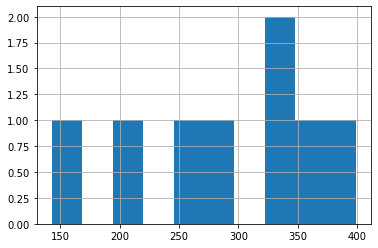

In [240]:
print('Average Living area for Afton Oakes is :',SubGrouped.LivingSqft.get_group('afton oaks').mean())
print('Median Living area for Afton Oakes is :',SubGrouped.LivingSqft.get_group('afton oaks').median())
SubGrouped.LivingSqft.get_group('afton oaks').hist()

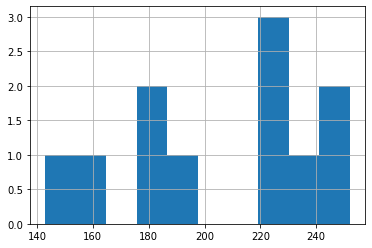

In [241]:
SubGrouped.DiningSqft.get_group('afton oaks').hist(bins=10)

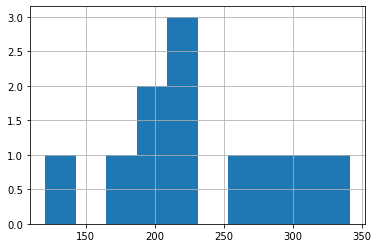

In [242]:
SubGrouped.KitchenSqft.get_group('afton oaks').hist(bins=10)


In [243]:
single_family_df['LivingSqft'] = single_family_df.groupby('SubName')['LivingSqft'].apply(lambda x: x.fillna(x.median()))
single_family_df['DiningSqft'] = single_family_df.groupby('SubName')['DiningSqft'].apply(lambda x: x.fillna(x.median()))
single_family_df['KitchenSqft'] = single_family_df.groupby('SubName')['KitchenSqft'].apply(lambda x: x.fillna(x.median()))

In [244]:
single_family_df['LivingSqft'].isna().sum()

1372

In [245]:
single_family_df['DiningSqft'].isna().sum()

1232

In [246]:
single_family_df['KitchenSqft'].isna().sum()

979

We still have some null values and it seems there is no information for those subdivisions. lets drop them.

In [248]:
single_family_df=single_family_df[~single_family_df['DiningSqft'].isnull()]

In [249]:
single_family_df['LivingSqft'].isna().sum()

662

In [250]:
single_family_df['KitchenSqft'].isna().sum()

292

In [251]:
single_family_df=single_family_df[~single_family_df['LivingSqft'].isnull()]

In [252]:
single_family_df['KitchenSqft'].isna().sum()

192

In [253]:
single_family_df=single_family_df[~single_family_df['KitchenSqft'].isnull()]

## 1.9 Listing Price<a id='1.9_Listing_Price'></a>

In [255]:
single_family_df['Listing Price:'].isna().sum()

1

In [256]:
single_family_df=single_family_df[~single_family_df['Listing Price:'].isnull()]

In [257]:
single_family_df['Listing Price:']=single_family_df['Listing Price:'].str.split(' ').str[1]
single_family_df['Listing Price:']=single_family_df['Listing Price:'].str.replace(',','')
single_family_df['Listing Price:']=pd.to_numeric(single_family_df['Listing Price:'])
single_family_df.rename(columns = {'Listing Price:':'ListingPrice','Address:':'Address', 'Zip Code:':'ZipCode', 'County:':'County',
                                 'Subdivision:':'sub', 'Legal Description:':'Legal'},inplace=True)

In [258]:
single_family_df['ListingPrice'].describe()

count    5.831000e+03
mean     5.772292e+05
std      7.049707e+05
min      4.700000e+04
25%      2.513075e+05
50%      3.678400e+05
75%      6.076190e+05
max      1.450000e+07
Name: ListingPrice, dtype: float64

In [259]:
single_family_df.loc[single_family_df.ListingPrice <10000]

,image_link,ListingPrice,Address,City:,ZipCode,County,Legal,Bedrooms:,Baths:,Stories:,...,DiningSqft,KitchenSqft,SubName,MedianApp,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate


## 1.10 Bedrooms<a id='1.10_Bedrooms'></a>

In [261]:
single_family_df[['Bedrooms:','Bedroom:','Primary Bedroom:']]

,Bedrooms:,Bedroom:,Primary Bedroom:
7,3 Bedroom(s),"['11 x 13, 1st', '11 x 13, 3rd', '11 , 13, 1st...","['14 x 18, 3rd', '14 , 18, 3rd']"
8,3 Bedroom(s),"['12 x 13, 1st', '11 x 13, 3rd', '12 , 13, 1st...","['14 x 21, 3rd', '14 , 21, 3rd']"
12,3 Bedroom(s),"['13X10, 3rd', '12X11, 1st', '3.96 x 3.05(m)',...","['14X12, 3rd', '4.27 x 3.66(m)']"
13,3 Bedroom(s),"['13X10, 3rd', '12X11, 1st', '3.96 x 3.05(m)',...","['14X12, 3rd', '4.27 x 3.66(m)']"
19,3 Bedroom(s),"['13X10, 1st', '12X11, 3rd', '3.96 x 3.05(m)',...","['14X13, 3rd', '4.27 x 3.96(m)']"
...,...,...,...
11027,3 Bedroom(s),"['12x11, 1st', '12x11, 1st', '3.66 x 3.35(m)',...","['13x15, 1st', '3.96 x 4.57(m)']"
11029,2 Bedroom(s),"['11 x 11.5, 1st', '11 x 11.5, 1st', '11 , 11....",NaN
11030,3 Bedroom(s),"['12x12, 1st', '12x9, 1st', '3.66 x 3.66(m)', ...","['12x12, 1st', '3.66 x 3.66(m)']"
11031,4 Bedroom(s),"['12x8, 2nd', '8x10, 4th', '11x11, 3rd', '3.66...","['12x12, 1st', '3.66 x 3.66(m)']"


In [262]:
single_family_df[['Bedrooms:','Bedroom:','Primary Bedroom:','Average Bedrooms:']].isna().sum()

Bedrooms:             15
Bedroom:              40
Primary Bedroom:     321
Average Bedrooms:     26
dtype: int64

First I calculate area for Bedroom and Primary Bedroom separately then fill null values for with the median of area per subdivision and 0 for bedroom and primary bedroom respectively. then add them as total bedrooms in Sqft. 

In [263]:
single_family_df['Primary_Bedroom_clean'] = single_family_df['Primary Bedroom:'].str.split(',')
single_family_df['Primary_Bedroom_clean'] = single_family_df['Primary_Bedroom_clean'].apply(area_calc)
single_family_df.update(single_family_df[['Primary_Bedroom_clean']].fillna(0))

single_family_df['Bedroom_clean'] = single_family_df['Bedroom:'].str.split(',')
single_family_df['Bedroom_clean'] = single_family_df['Bedroom_clean'].apply(area_calc)
single_family_df['Bedroom_clean'] = single_family_df.groupby('SubName')['Bedroom_clean'].transform(lambda x: x.fillna(x.median()))

In [264]:
single_family_df['TotalBedSqft'] = single_family_df['Bedroom_clean'] + single_family_df['Primary_Bedroom_clean']

In [265]:
pd.options.display.max_colwidth = 100
single_family_df[['Bedrooms:','Bedroom:','Primary Bedroom:','Primary_Bedroom_clean','Bedroom_clean','TotalBedSqft']].sample(20,random_state=100)

,Bedrooms:,Bedroom:,Primary Bedroom:,Primary_Bedroom_clean,Bedroom_clean,TotalBedSqft
1320,4 Bedroom(s),"['11x10, 2nd', '12x14, 2nd', '16x12, 2nd', '3.35 x 3.05(m)', '3.66 x 4.27(m)', '4.88 x 3.66(m)']","['20x14, 2nd', '6.10 x 4.27(m)']",280.0,470.0,750.0
7225,3 Bedroom(s),"['13x13, 1st', '11X11, 1st', '3.96 x 3.96(m)', '3.35 x 3.35(m)']","['18x16, 1st', '5.49 x 4.88(m)']",288.0,290.0,578.0
9274,4 Bedroom(s),"['14x18, 2nd', '12x12, 2nd', '12x12, 2nd', '4.27 x 5.49(m)', '3.66 x 3.66(m)', '3.66 x 3.66(m)']","['13x15, 1st', '3.96 x 4.57(m)']",195.0,540.0,735.0
1275,4 Bedroom(s),"['14x10, 1st', '10x10, 1st', '10x10, 1st', '4.27 x 3.05(m)', '3.05 x 3.05(m)', '3.05 x 3.05(m)']","['15x11, 1st', '4.57 x 3.35(m)']",165.0,340.0,505.0
4911,4 Bedroom(s),"['11x11, 2nd', '11x11, 2nd', '11x11, 2nd', '3.35 x 3.35(m)', '3.35 x 3.35(m)', '3.35 x 3.35(m)']","['15x13, 2nd', '4.57 x 3.96(m)']",195.0,363.0,558.0
10221,3 Bedroom(s),"['11x10, 1st', '12x10, 1st', '3.35 x 3.05(m)', '3.66 x 3.05(m)']","['16x13, 1st', '4.88 x 3.96(m)']",208.0,230.0,438.0
7893,3 Bedroom(s),"['10x10, 2nd', '10x10, 2nd', '3.05 x 3.05(m)', '3.05 x 3.05(m)']","['17x12, 2nd', '5.18 x 3.66(m)']",204.0,200.0,404.0
6250,4 - 5 Bedroom(s),"['16x12, 2nd', '14x14, 2nd', '14x14, 2nd', '4.88 x 3.66(m)', '4.27 x 4.27(m)', '4.27 x 4.27(m)']","['18x12, 2nd', '5.49 x 3.66(m)']",216.0,584.0,800.0
641,3 - 4 Bedroom(s),"['16x15, 1st', '12x12, 4th', '4.88 x 4.57(m)', '3.66 x 3.66(m)']","['21x14, 3rd', '6.40 x 4.27(m)']",294.0,384.0,678.0
5162,4 Bedroom(s),"['12x11, 1st', '11x11, 1st', '11x11, 1st', '3.66 x 3.35(m)', '3.35 x 3.35(m)', '3.35 x 3.35(m)']","['15x13, 1st', '4.57 x 3.96(m)']",195.0,374.0,569.0


In [266]:
single_family_df[single_family_df.TotalBedSqft==0][['Year Built:','Bedroom:','Primary Bedroom:','TotalBedSqft']]

,Year Built:,Bedroom:,Primary Bedroom:,TotalBedSqft
623,1945 / Seller,"['verify, 1st', 'verify, 1st', 'verify, 1st', 'verify, 1st', 'verify, 1st', 'verify, 1st']",NaN,0.0
909,1930 / Appraisal District,"['Unknown, 3rd', 'Unknown, 2nd', 'Unknown, 3rd', 'Unknown, 2nd']","['Unknown, 1st', 'Unknown, 1st']",0.0
916,1915 / Appraisal District,"['Verify, 2nd', 'Verify, 1st', 'Verify, 2nd', 'Verify, 1st']","['Verify, 1st', 'Verify, 1st']",0.0
968,1940 / Appraisal District,"['TBD, 1st', 'TBD, 1st', 'TBD, 1st', 'TBD, 1st']","['TBD, 1st', 'TBD, 1st']",0.0
971,2018 / Appraisal,"['TBC, 2nd', 'TBC, 1st', 'TBC, 2nd', 'TBC, 2nd', 'TBC, 2nd', 'TBC, 1st', 'TBC, 2nd', 'TBC, 2nd']","['TBC, 1st', 'TBC, 1st']",0.0
...,...,...,...,...
10044,2020 / Builder,"['0x0, 2nd', '0x0, 2nd', '0x0, 1st', '0x0, 2nd', '0,0, 2nd', '0,0, 2nd', '0,0, 1st', '0,0, 2nd']","['0x0, 1st', '0,0, 1st']",0.0
10052,2020 / Builder,"['0x0, 1st', '0x0, 2nd', '0,0, 1st', '0,0, 2nd']","['0x0, 1st', '0,0, 1st']",0.0
10054,2020 / Builder,"['0x0, 1st', '0x0, 1st', '0x0, 2nd', '0,0, 1st', '0,0, 1st', '0,0, 2nd']","['0x0, 1st', '0,0, 1st']",0.0
10055,2020 / Builder,"['0x0, 1st', '0x0, 1st', '0x0, 1st', '0,0, 1st', '0,0, 1st', '0,0, 1st']","['0x0, 1st', '0,0, 1st']",0.0


In [267]:
single_family_df['TotalBedSqft'] = single_family_df.groupby('SubName')['TotalBedSqft'].transform(lambda x: x.fillna(x.mean()))

In [268]:
single_family_df[single_family_df.TotalBedSqft==0][['Year Built:','Bedroom:','Primary Bedroom:','TotalBedSqft']]

,Year Built:,Bedroom:,Primary Bedroom:,TotalBedSqft
623,1945 / Seller,"['verify, 1st', 'verify, 1st', 'verify, 1st', 'verify, 1st', 'verify, 1st', 'verify, 1st']",NaN,0.0
909,1930 / Appraisal District,"['Unknown, 3rd', 'Unknown, 2nd', 'Unknown, 3rd', 'Unknown, 2nd']","['Unknown, 1st', 'Unknown, 1st']",0.0
916,1915 / Appraisal District,"['Verify, 2nd', 'Verify, 1st', 'Verify, 2nd', 'Verify, 1st']","['Verify, 1st', 'Verify, 1st']",0.0
968,1940 / Appraisal District,"['TBD, 1st', 'TBD, 1st', 'TBD, 1st', 'TBD, 1st']","['TBD, 1st', 'TBD, 1st']",0.0
971,2018 / Appraisal,"['TBC, 2nd', 'TBC, 1st', 'TBC, 2nd', 'TBC, 2nd', 'TBC, 2nd', 'TBC, 1st', 'TBC, 2nd', 'TBC, 2nd']","['TBC, 1st', 'TBC, 1st']",0.0
...,...,...,...,...
10044,2020 / Builder,"['0x0, 2nd', '0x0, 2nd', '0x0, 1st', '0x0, 2nd', '0,0, 2nd', '0,0, 2nd', '0,0, 1st', '0,0, 2nd']","['0x0, 1st', '0,0, 1st']",0.0
10052,2020 / Builder,"['0x0, 1st', '0x0, 2nd', '0,0, 1st', '0,0, 2nd']","['0x0, 1st', '0,0, 1st']",0.0
10054,2020 / Builder,"['0x0, 1st', '0x0, 1st', '0x0, 2nd', '0,0, 1st', '0,0, 1st', '0,0, 2nd']","['0x0, 1st', '0,0, 1st']",0.0
10055,2020 / Builder,"['0x0, 1st', '0x0, 1st', '0x0, 1st', '0,0, 1st', '0,0, 1st', '0,0, 1st']","['0x0, 1st', '0,0, 1st']",0.0


In [269]:
single_family_df = single_family_df[single_family_df.TotalBedSqft!=0]

In [270]:
single_family_df[single_family_df.TotalBedSqft>1500][['Bedrooms:','Bedroom:','Primary Bedroom:','TotalBedSqft','Address','Building Sqft.:']]

,Bedrooms:,Bedroom:,Primary Bedroom:,TotalBedSqft,Address,Building Sqft.:
309,5 Bedroom(s),"['19x14, 2nd', '12x10, 2nd', '16x13, 2nd', '5.79 x 4.27(m)', '3.66 x 3.05(m)', '4.88 x 3.96(m)']","['18x18, 1st', '39x20, 2nd', '5.49 x 5.49(m)', '11.89 x 6.10(m)']",1698.000000,6339 Buffalo Speedway,"9,230857(mÂ²) /Appraisal District"
632,5 Bedroom(s),"['25x18, 1st', '22x30, 4th', '23x15, 2nd', '12x17, 3rd', '7.62 x 5.49(m)', '6.71 x 9.14(m)', '7....","['27x17, 1st', '8.23 x 5.18(m)']",2118.000000,832 Yale Street,"15,0001,394(mÂ²) /Appraisal District"
800,5 Bedroom(s),"['17x14, 2nd', '27x24, 2nd', '17x14, 2nd', '14x13, 2nd', '5.18 x 4.27(m)', '8.23 x 7.32(m)', '5....","['19x19, 1st', '5.79 x 5.79(m)']",1667.000000,1035 Harvard Street,"6,814633(mÂ²) /Appraisal District"
865,2 Bedroom(s),"['13 x 12, 1st', '13 , 12, 1st']","['13 1/2 x 15 1/2, 1st', '13 1/2 , 15 1/2, 1st']",19984.027778,515 W 14th Street,"1,135105(mÂ²) /Appraisal District"
1537,6 - 7 Bedroom(s),"['16x14, 2nd', '16x15, 2nd', '19x15, 2nd', '15x13, 2nd', '20x16, 2nd', '4.88 x 4.27(m)', '4.88 x...","['23x15, 2nd', '7.01 x 4.57(m)']",1609.000000,3330 Chevy Chase Drive,"10,121940(mÂ²) /Appraisal District"
1539,5 Bedroom(s),"['14x15, 2nd', '17x21, 2nd', '14x20, 2nd', '16x17, 2nd', '4.27 x 4.57(m)', '5.18 x 6.40(m)', '4....","['17x28, 2nd', '5.18 x 8.53(m)']",1595.000000,3315 Del Monte Drive,"7,223671(mÂ²) /Appraisal District"
1655,5 Bedroom(s),"['19x23, 2nd', '14x18, 2nd', '14x18, 2nd', '11x14, 2nd', '5.79 x 7.01(m)', '4.27 x 5.49(m)', '4....","['19x26, 2nd', '5.79 x 7.92(m)']",1589.000000,3257 Inwood,"9,426876(mÂ²) /Appraisal District"
1660,5 - 6 Bedroom(s),"['18x15, 3rd', '22x12, 2nd', '22x12, 2nd', '18x12, 2nd', '5.49 x 4.57(m)', '6.71 x 3.66(m)', '6....","['25x25, 2nd', '7.62 x 7.62(m)']",1639.000000,2441 Del Monte Drive,"7,090659(mÂ²) /Appraisal District"
2285,4 - 5 Bedroom(s),"['15\' x 16\'2"", 2nd', '13\'2"" x 15\', 2nd', '13\'2"" x 151, 3rd', '15\' , 16\'2"", 2nd', '13\'2"" ...","['16\' x 19\'6"", 2nd', '16\' , 19\'6"", 2nd']",2740.166667,3211 Banbury Place,"5,787538(mÂ²) /Builder"
2294,5 Bedroom(s),"['19x17, 2nd', '20x19, 2nd', '20x13, 2nd', '21x15, 2nd', '5.79 x 5.18(m)', '6.10 x 5.79(m)', '6....","['25x22, 1st', '7.62 x 6.71(m)']",1828.000000,3465 Overbrook Lane Lane,"9,767907(mÂ²) /Appraisal District"


In [271]:
single_family_df.loc[153,'TotalBedSqft'] = 484.8
single_family_df.loc[196,'TotalBedSqft'] = 506
single_family_df.loc[781,'TotalBedSqft'] = 365.25
single_family_df.loc[3687,'TotalBedSqft'] = 395.6
single_family_df.loc[4384,'TotalBedSqft'] = 550
single_family_df.loc[4390,'TotalBedSqft'] = 676
single_family_df.loc[4446,'TotalBedSqft'] = 1747
single_family_df.loc[5083,'TotalBedSqft'] = 696
single_family_df.loc[6437,'TotalBedSqft'] = 432
single_family_df.loc[6566,'TotalBedSqft'] = 1915
single_family_df.loc[6891,'TotalBedSqft'] = 653
single_family_df.loc[7505,'TotalBedSqft'] = 675.521
single_family_df.loc[7733,'TotalBedSqft'] = 820
single_family_df.loc[10176,'TotalBedSqft'] = 674
single_family_df.loc[10218,'TotalBedSqft'] = 655
single_family_df.loc[10849,'TotalBedSqft'] = 496

In [272]:
single_family_df['Bedrooms:'].isnull().sum()

24

There are 15 houses with no information about bedrooms and I will drop those rows.

In [273]:
single_family_df=single_family_df[~single_family_df['Bedrooms:'].isnull()]

In [274]:
single_family_df['Bedrooms:']=single_family_df['Bedrooms:'].str.split(' ').str[0]
single_family_df['Bedrooms:']=single_family_df['Bedrooms:'].astype(int)
single_family_df.rename(columns = {'Bedrooms:':'NoBed'},inplace=True)
single_family_df['NoBed'].describe()

count    5753.000000
mean        3.754910
std         0.794674
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        10.000000
Name: NoBed, dtype: float64

In [275]:
single_family_df['Average Bedrooms:'].isna().sum()

26

In [276]:
single_family_df.groupby('SubName')['Average Bedrooms:'].value_counts()

SubName                              Average Bedrooms:
aberdeen green                       3.46                 3
aberdeen green sec 03                3.46                 2
aberdeen trails                      3.84                 1
aberdeen trails sec 02               3.84                 1
aberdeen trails sec 04               3.84                 1
                                                         ..
wrights landing at legends trace 02  3.64                 1
wynden creek villas                  3.83                 1
wyndham village                      4.16                 2
yaupon trls sec 1                    3.67                 1
yorkshire sec 02 r/p                 4.59                 1
Name: Average Bedrooms:, Length: 2054, dtype: int64

In [278]:
single_family_df['Average Bedrooms:'].loc[single_family_df.SubName=='afton oaks']

2287    3.63
2301    3.56
2302    3.56
2303    3.56
2304    3.56
2305    3.56
2313    3.56
2319    3.56
2335    3.56
2340    3.56
2358    3.56
Name: Average Bedrooms:, dtype: float64

It seems average bedroom is same for each subdivision. We can fill null values with the mean. 

In [279]:
single_family_df['Average Bedrooms:'] = single_family_df.groupby('SubName')['Average Bedrooms:'].transform(lambda x: x.fillna(x.mean()))

In [280]:
single_family_df['Average Bedrooms:'].isna().sum()

25

So there is no information for those subdivisions. lets drop these rows

In [281]:
single_family_df=single_family_df[~single_family_df['Average Bedrooms:'].isnull()]
single_family_df.rename(columns ={'Average Bedrooms:':'AvgBed'},inplace=True)

In [282]:
single_family_df.drop(['Bedroom:','Primary Bedroom:','Primary_Bedroom_clean','Bedroom_clean'],axis=1,inplace=True)

## 1.11 Bathrooms<a id='1.11_Bathrooms'></a>

In [283]:
single_family_df['Baths:'].isnull().sum()

2

In [284]:
single_family_df=single_family_df[~single_family_df['Baths:'].isnull()]

In [285]:
single_family_df[['Baths:']]

,Baths:
7,3 Full & 1 Half Bath(s)
8,3 Full & 1 Half Bath(s)
12,3 Full & 1 Half Bath(s)
13,3 Full & 1 Half Bath(s)
19,3 Full & 1 Half Bath(s)
...,...
11027,1 Full & 1 Half Bath(s)
11029,1 Full Bath(s)
11030,2 Full Bath(s)
11031,2 Full Bath(s)


In [286]:
single_family_df['FullBath']=single_family_df['Baths:'].str.split(' ').str[0].astype(int)

In [287]:
single_family_df['FullBath']

7        3
8        3
12       3
13       3
19       3
        ..
11027    1
11029    1
11030    2
11031    2
11033    1
Name: FullBath, Length: 5726, dtype: int32

In [288]:
No_Bath = single_family_df['Baths:'].str.split('&').str[1].str.strip()
No_Bath.fillna('0',inplace=True) 
single_family_df['HalfBath']=[int(item[0]) for item in No_Bath.str.split(' ')]
single_family_df['HalfBath'].replace(',','',inplace=True)
single_family_df[['FullBath','HalfBath']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5726 entries, 7 to 11033
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   FullBath  5726 non-null   int32
 1   HalfBath  5726 non-null   int64
dtypes: int32(1), int64(1)
memory usage: 111.8 KB


In [289]:
single_family_df.drop('Baths:',axis=1,inplace=True)

## 1.12 Stories<a id='1.12_Stories'></a>

In [290]:
single_family_df['Stories:'].value_counts()

2.0       2888
1.0       2313
3.0        320
1.5        156
4.0         37
2.5          9
2576.0       1
5.0          1
Name: Stories:, dtype: int64

There is one house with 2576 stories which I believe it is a typo. Lets take look at this home.

In [291]:
single_family_df['Stories:'].isnull().sum()

1

In [292]:
single_family_df=single_family_df[~single_family_df['Stories:'].isnull()]

In [293]:
single_family_df.rename(columns ={'Stories:':'Stories'},inplace=True)
single_family_df['Stories']=pd.to_numeric(single_family_df['Stories'])

In [294]:
single_family_df['Address'].loc[single_family_df['Stories']>4]

539        5334 Calle Cadiz Place
10097    22614 Auburn Valley Lane
Name: Address, dtype: object

The second one is an apartment and second one is 2 stories house. know we replace 2576 with 2.

In [295]:
single_family_df['Stories'].loc[single_family_df['Stories']==2576]=2

In [296]:
single_family_df['Stories'].value_counts()

2.0    2889
1.0    2313
3.0     320
1.5     156
4.0      37
2.5       9
5.0       1
Name: Stories, dtype: int64

Since we are looking for single family homes, those apartment are different from what we are looking for. so, images for those houses would be different. I will keep the houses with have equal or less than 3 stories.

In [297]:
single_family_df = single_family_df[single_family_df.Stories < 4]
single_family_df['Stories'].value_counts()

2.0    2889
1.0    2313
3.0     320
1.5     156
2.5       9
Name: Stories, dtype: int64

## 1.13 Style<a id='1.13_Style'></a>

In [298]:
single_family_df['Style:'].value_counts()

Traditional                                      3978
Contemporary/Modern                               463
Ranch                                             244
Contemporary/Modern,Traditional                   162
Ranch,Traditional                                 130
                                                 ... 
French,Mediterranean,Traditional                    1
Contemporary/Modern,English,Ranch,Traditional       1
Other Style,Spanish,Traditional                     1
Mediterranean,Ranch,Spanish,Traditional             1
Contemporary/Modern,Georgian,Traditional            1
Name: Style:, Length: 70, dtype: int64

In [299]:
single_family_df['Style:'].isnull().sum()

0

In [300]:
single_family_df.rename(columns ={'Style:':'Style'},inplace=True)

In [301]:
single_family_df['Style'].unique()

array(['Contemporary/Modern', 'Traditional', 'Other Style',
       'Contemporary/Modern,Traditional', 'Split Level',
       'Mediterranean,Spanish', 'Ranch', 'Mediterranean',
       'Other Style,Traditional', 'Contemporary/Modern,French',
       'Contemporary/Modern,English,French', 'French',
       'Mediterranean,Traditional', 'Spanish', 'French,Traditional',
       'Colonial', 'Spanish,Traditional', 'Colonial,Georgian',
       'Georgian,Traditional', 'Colonial,Traditional', 'Georgian',
       'Other Style,Ranch', 'Contemporary/Modern,French,Traditional',
       'Victorian', 'Traditional,Victorian',
       'Contemporary/Modern,English,Traditional',
       'Colonial,Contemporary/Modern',
       'Contemporary/Modern,Mediterranean,Traditional',
       'Contemporary/Modern,Mediterranean', 'English',
       'Ranch,Traditional', 'Other Style,Traditional,Victorian',
       'Contemporary/Modern,Split Level,Traditional', 'Colonial,French',
       'Georgian,Victorian', 'Contemporary/Modern,Ranc

In [302]:
standard_style=['Contemporary/Modern','Traditional','Mediterranean','Colonial','Ranch','Split Level','Other']
#For each correct roof  type . in standard roof list
for style in standard_style:
    
    # Find matches in gender
    matches = process.extract(style, single_family_df.Style,
                 limit = single_family_df.shape[0])
    
    
# For each possible_match with similarity score >= 90
    for possible_match in matches:
        if possible_match[1] >= 90:
      
            
            matching = single_family_df.Style == possible_match[0]
           # I decided to use 'W' for female since there is high similarity between 'female' and 'male' 
        single_family_df.loc[matching , 'Style'] = style

## 1.14 Year Built<a id='1.14_Year_Built'></a>

In [303]:
single_family_df['Year Built:'].isnull().sum()

17

In [304]:
single_family_df['Year Built:'].value_counts()

2020   / Builder               730
2006   / Appraisal District    130
2005   / Appraisal District    110
1960   / Appraisal District    104
2015   / Appraisal District     99
                              ... 
2010   / Appraisal               1
1907   / Appraisal               1
1896   / Appraisal               1
1945   / Appraisal               1
1988   / Appraisal               1
Name: Year Built:, Length: 269, dtype: int64

In [305]:
single_family_df=single_family_df[~single_family_df['Year Built:'].isnull()]
single_family_df['Year Built:']=single_family_df['Year Built:'].apply(lambda x:str(x).split(' ')[0])
single_family_df['Year Built:']=pd.to_datetime(single_family_df['Year Built:'],format='%Y').dt.year
single_family_df['Year Built:'].value_counts()

2020    770
2006    148
2015    129
2005    118
1960    117
       ... 
1875      1
1907      1
1919      1
1923      1
1896      1
Name: Year Built:, Length: 113, dtype: int64

Those houses with year build of 2020 mostly under construction and there is no images from inside or even outside. I will drop those houses too.

In [306]:
single_family_df.rename(columns ={'Year Built:':'YearBuilt'},inplace=True)

In [307]:
single_family_df = single_family_df[single_family_df.YearBuilt < 2020]
single_family_df['YearBuilt'].value_counts()

2006    148
2015    129
2005    118
1960    117
2014    111
       ... 
1916      1
1908      1
1904      1
1900      1
1896      1
Name: YearBuilt, Length: 111, dtype: int64

## 1.15 Building Sqft<a id='1.15_Building_Sqft'></a>

In [308]:
single_family_df['Building Sqft.:']

13                  1,736161(mÂ²)  /Builder
20       2,671248(mÂ²)  /Appraisal District
29       1,688157(mÂ²)  /Appraisal District
30       1,410131(mÂ²)  /Appraisal District
33       2,392222(mÂ²)  /Appraisal District
                        ...                
11027    1,160108(mÂ²)  /Appraisal District
11029       83978(mÂ²)  /Appraisal District
11030       92386(mÂ²)  /Appraisal District
11031    1,563145(mÂ²)  /Appraisal District
11033    1,348125(mÂ²)  /Appraisal District
Name: Building Sqft.:, Length: 4849, dtype: object

In [309]:
single_family_df['Building Sqft.:'].isnull().sum()

9

In [310]:
single_family_df=single_family_df[~single_family_df['Building Sqft.:'].isnull()]
single_family_df['Building Sqft.:']=single_family_df['Building Sqft.:'].apply(lambda x:x.split(',')[0] + x.split(',')[1][0:3] if ',' in x else x[0:3])
single_family_df['Building Sqft.:']=single_family_df['Building Sqft.:'].str.replace(',','')
single_family_df['Building Sqft.:']=pd.to_numeric(single_family_df['Building Sqft.:'])
single_family_df.rename(columns ={'Building Sqft.:':'BuildSqft'},inplace=True)

In [311]:
single_family_df.BuildSqft.describe()

count     4840.000000
mean      2911.815702
std       1368.037476
min        680.000000
25%       2019.000000
50%       2615.000000
75%       3499.250000
max      21032.000000
Name: BuildSqft, dtype: float64

## 1.16 Lot Size<a id='1.16_Lot_Size'></a>

In [312]:
single_family_df['Lot Size:'].isnull().sum()

31

In [313]:
single_family_df=single_family_df[~single_family_df['Lot Size:'].isnull()]

In [314]:
single_family_df['Lot Size:']

13       1,428 Sqft.133(mÂ²)  /Appraisal District
20       2,006 Sqft.186(mÂ²)  /Appraisal District
29       1,918 Sqft.178(mÂ²)  /Appraisal District
30       1,845 Sqft.171(mÂ²)  /Appraisal District
33       2,048 Sqft.190(mÂ²)  /Appraisal District
                           ...                   
11027    7,100 Sqft.660(mÂ²)  /Appraisal District
11029    7,100 Sqft.660(mÂ²)  /Appraisal District
11030    7,100 Sqft.660(mÂ²)  /Appraisal District
11031    7,100 Sqft.660(mÂ²)  /Appraisal District
11033    7,100 Sqft.660(mÂ²)  /Appraisal District
Name: Lot Size:, Length: 4809, dtype: object

In [315]:
single_family_df['Lot Size:']=single_family_df['Lot Size:'].str.replace(',','')
single_family_df['Lot Size:']=single_family_df['Lot Size:'].apply(lambda x:float(x.split(' ')[0])*43560 if 'Acres' in 
                                                                  x else float(x.split(' ')[0]))

# single_family_df['Lot Size:']=pd.to_numeric(single_family_df['Lot Size:'])
single_family_df.rename(columns ={'Lot Size:':'LotSize'},inplace=True)

In [316]:
single_family_df.LotSize.describe()

count    4.809000e+03
mean     1.168688e+04
std      3.257126e+04
min      9.450000e+02
25%      6.600000e+03
50%      8.395000e+03
75%      1.039000e+04
max      1.306800e+06
Name: LotSize, dtype: float64

the minimum lot size is 0 which need to investigate.

In [317]:
single_family_df[single_family_df.LotSize <1000]

,image_link,ListingPrice,Address,City:,ZipCode,County,Legal,NoBed,Stories,Style,...,MedianApp,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath
3267,"['https://photos.harstatic.com/191172097/hr/img-1.jpeg?ts=2020-11-10T18:10:20.193', 'https://pho...",339000.0,9609 Fannin Station E,Houston,77045.0,Harris County,LT 52 BLK 1 FANNIN STATION SEC 1,3,3.0,Contemporary/Modern,...,349985.0,2013.0,1383.0,371500.0,166.43,8636.0,2.4216,485.479167,3,1


There is one house with lot size less than 1000. lest drop it.

In [318]:
single_family_df = single_family_df[single_family_df.LotSize >= 1000]
single_family_df.LotSize.describe()

count    4.808000e+03
mean     1.168911e+04
std      3.257428e+04
min      1.200000e+03
25%      6.600000e+03
50%      8.395500e+03
75%      1.039225e+04
max      1.306800e+06
Name: LotSize, dtype: float64

## 1.17 Maintenance Fee<a id='1.17_Maintenance_Fee'></a>

In [319]:
single_family_df['Maintenance Fee:']

13       ['$ 1195 / Annually', 'Mandatory / $1195 / Annually']
20       ['$ 2244 / Annually', 'Mandatory / $2244 / Annually']
29       ['$ 1500 / Annually', 'Mandatory / $1500 / Annually']
30       ['$ 1400 / Annually', 'Mandatory / $1400 / Annually']
33       ['$ 2250 / Annually', 'Mandatory / $2250 / Annually']
                                 ...                          
11027                                                       No
11029                                                       No
11030                                                       No
11031                                                       No
11033                                                       No
Name: Maintenance Fee:, Length: 4808, dtype: object

In [320]:
single_family_df['Maintenance Fee:'].isnull().sum()

11

In [321]:
single_family_df['Maintenance Fee:'].value_counts()

No                                                       1125
['$ 450 / Annually', 'Mandatory / $450 / Annually']        93
Voluntary                                                  87
['$ 650 / Annually', 'Mandatory / $650 / Annually']        87
['$ 350 / Annually', 'Mandatory / $350 / Annually']        79
                                                         ... 
['$ 700 / Quarterly', 'Mandatory / $700 / Quarterly']       1
['$ 45 / Annually', 'Voluntary / $45 / Annually']           1
['$ 282 / Annually', 'Mandatory / $282 / Annually']         1
['$ 1015 / Annually', 'Mandatory / $1015 / Annually']       1
['$ 573 / Annually', 'Mandatory / $573 / Annually']         1
Name: Maintenance Fee:, Length: 712, dtype: int64

In [322]:
single_family_df['Maintenance Fee:'].isin(['No','No / $0','Voluntary / Annually','Voluntary /0/ Annually']).sum()

1164

In [323]:
def MaintenanceFee(fee):
    """This function calculates the Maintenance fee for this column"""
    if type(fee) != float:
        fee = fee.split(',')[0].split('/')
        if fee[0].strip() in ['No','No / $0','Voluntary / Annually','Voluntary /0/ Annually','Voluntary','Mandatory']:
            fee = 0
        elif len(fee) > 1 and fee[1].replace('\'','').strip() in ['Annually']:
            fee = float(fee[0].replace('$','').replace('\'','').replace(' ','').replace('[',''))
        elif len(fee) > 1 and fee[1].replace('\'','').strip() in ['Quarterly']:   
            fee = float(fee[0].replace('$','').replace('\'','').replace(' ','').replace('[',''))*4
        elif len(fee) > 1 and fee[1].replace('\'','').strip() in ['Monthly']:   
            fee = float(fee[0].replace('$','').replace('\'','').replace(' ','').replace('[',''))*12 
        else:
            fee = float(fee[0].replace('$','').replace('\'','').replace(' ','').replace('[',''))
    else:
        fee = 0
    return fee

In [324]:
single_family_df['MaintenanceFee'] = single_family_df['Maintenance Fee:'].apply(MaintenanceFee)

In [325]:
single_family_df.drop('Maintenance Fee:',axis=1,inplace=True)

## 1.18 Fireplace<a id='1.18_Fireplace'></a>

In [326]:
single_family_df['Fireplace:'].value_counts()

1/Gaslog Fireplace                                          919
1/Gas Connections                                           495
1                                                           475
1/Wood Burning Fireplace                                    365
1/Gas Connections, Gaslog Fireplace                         274
                                                           ... 
1/Freestanding, Gaslog Fireplace, Wood Burning Fireplace      1
4                                                             1
1/Gas Connections, Stove                                      1
2/Freestanding, Gaslog Fireplace, Wood Burning Fireplace      1
2/Stove, Wood Burning Fireplace                               1
Name: Fireplace:, Length: 78, dtype: int64

In [327]:
pd.Series([str(x)[0]  for x in single_family_df['Fireplace:'] if x is not None]).value_counts()

1    3086
n    1218
2     365
3      82
/      26
4      22
5       9
dtype: int64

In [328]:
single_family_df['Fireplace:']=single_family_df['Fireplace:'].apply(lambda x:int(str(x)[0]) if str(x)[0]
                                                                    in ['1','2','3','4','5','6','7'] else 0)

In [329]:
single_family_df['Fireplace:'].value_counts()

1    3086
0    1244
2     365
3      82
4      22
5       9
Name: Fireplace:, dtype: int64

## 1.19 HOA Mandatory<a id='1.19_HOA_Mandatory'></a>

In [330]:
single_family_df['HOA Mandatory:']

13       Yes
20       Yes
29       Yes
30       Yes
33       Yes
        ... 
11027     No
11029     No
11030     No
11031     No
11033     No
Name: HOA Mandatory:, Length: 4808, dtype: object

We can fill null values for HOA by 'NO'.

In [331]:
single_family_df['HOA Mandatory:'][single_family_df['HOA Mandatory:'].isnull()]='No'
single_family_df.rename(columns ={'HOA Mandatory:':'HOA'},inplace=True)

In [332]:
missing = missing_cal(single_family_df)
missing.loc[missing['%'] > 0].sort_values(by="%",ascending=False)

,count,%
Median Appraised Value / Square ft.:,4773,99.272047
TotalBedSqft,2,0.041597
Legal,1,0.020799


Median Appraised Value / Square ft.: has 100% missing value we can drop it and also drop rows with null value for legal.

In [333]:
single_family_df.drop('Median Appraised Value / Square ft.:',axis = 1, inplace=True)
single_family_df=single_family_df[~single_family_df['Legal'].isnull()]
single_family_df=single_family_df[~single_family_df['TotalBedSqft'].isnull()]

lets take a look at dataset to see if we need to rename some columns:

In [334]:
single_family_df.columns

Index(['image_link', 'ListingPrice', 'Address', 'City:', 'ZipCode', 'County',
       'Legal', 'NoBed', 'Stories', 'Style', 'YearBuilt', 'BuildSqft',
       'LotSize', 'Fireplace:', 'Heating:', 'Cooling:', 'Ice Maker:',
       'Microwave:', 'Compactor:', 'Dishwasher:', 'Disposal:', 'Roof:',
       'Foundation:', 'Private Pool:', 'Exterior Type:', 'Lot Description:',
       'Controlled Access:', 'Water Sewer:', 'Unit Location:', 'Area Pool:',
       'Dwelling Type:', 'HOA', 'List Type:', 'Other Fees:', 'AvgBed',
       'Average Baths:', 'Carport Description:', 'UtilitySqft', 'StudySqft',
       'GameSqft', 'BreakfastSqft', 'Garage', 'LivingSqft', 'DiningSqft',
       'KitchenSqft', 'SubName', 'MedianApp', 'MedianYearBlt', 'MedianSqft',
       'AvgNeighborValRange', 'MedianPrice/Sqft', 'PaidTax', 'TaxRate',
       'TotalBedSqft', 'FullBath', 'HalfBath', 'MaintenanceFee'],
      dtype='object')

In [335]:
single_family_df.reset_index(inplace=True,drop=True)

In [336]:
single_family_df.rename(columns = {'City:':'City','Fireplace:':'Fireplace', 'Heating:':'Heating', 'Cooling:':'Cooling',
                                   'Ice Maker:':'IceMaker', 'Microwave:':'Microwave','Compactor:':'Compactor',
                                   'Dishwasher:':'Dishwasher','Disposal:':'Disposal','Roof:':'Roof',
                                   'Foundation:':'Foundation','Private Pool:':'PrivatePool',
                                   'Exterior Type:':'ExteriorType','Lot Description:':'LotDes',
                                   'Controlled Access:':'ControlAccess','Water Sewer:':'WaterSewer',
                                   'Unit Location:':'UnitLoc','Area Pool:':'AreaPool','Dwelling Type:':'DwellingType',
                                   'List Type:':'ListType','Other Fees:':'OtherFees','Average Baths:':'AvgBaths',
                                   'Carport Description:':'CarportDescription'},inplace=True)

In [337]:
single_family_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           4805 non-null   object 
 1   ListingPrice         4805 non-null   float64
 2   Address              4805 non-null   object 
 3   City                 4805 non-null   object 
 4   ZipCode              4805 non-null   float64
 5   County               4805 non-null   object 
 6   Legal                4805 non-null   object 
 7   NoBed                4805 non-null   int32  
 8   Stories              4805 non-null   float64
 9   Style                4805 non-null   object 
 10  YearBuilt            4805 non-null   int64  
 11  BuildSqft            4805 non-null   int64  
 12  LotSize              4805 non-null   float64
 13  Fireplace            4805 non-null   int64  
 14  Heating              4805 non-null   object 
 15  Cooling              4805 non-null   o

## 1.20 Other Fees<a id='1.20_Other_Fees'></a>

In [338]:
single_family_df.OtherFees.value_counts()

No                                                        2119
Yes / 250 / Transfer Fee                                   317
Yes / 250 / Transfer                                       126
Yes / 250                                                  103
Yes / 200 / Transfer Fee                                    83
                                                          ... 
Yes / $250 / .5% sales price/Transfer, Reserve/Cap fee       1
Yes / $ / Transfer Fee & Other                               1
Yes / 220 Transfer Fee                                       1
Yes / 175 / HOA TRANSFER FEE                                 1
Yes / 375 / Transfer and Statement of the Account            1
Name: OtherFees, Length: 905, dtype: int64

We need to clean this column and to do so I will change No value with 0 and calculate total fees for the rest.

In [341]:
single_family_df.drop('OtherFees',axis = 1, inplace=True)

In [342]:
single_family_df.head()

,image_link,ListingPrice,Address,City,ZipCode,County,Legal,NoBed,Stories,Style,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
0,"['https://photos.harstatic.com/189115929/hr/img-1.jpeg?ts=2020-08-31T18:04:52.670', 'https://pho...",364990.0,1735 Eado Point Lane,Houston,77003.0,Harris County,LT 17 BLK 2 EADO POINT,3,3.0,Contemporary/Modern,...,2018.0,1485.0,217000.0,192.51,2169.0,2.6554,430.0,3,1,1195.0
1,"['https://photos.harstatic.com/188179029/hr/img-1.jpeg?ts=2020-08-03T08:56:34.177', 'https://pho...",419000.0,619 Live Oak Street,Houston,77003.0,Harris County,LT 7 BLK 1 CAPITOL OAKS SEC 3 RP NO 1,3,3.0,Traditional,...,2012.0,1563.0,443500.0,200.05,9768.0,2.5466,320.0,3,1,2244.0
2,"['https://photos.harstatic.com/189915458/hr/img-1.jpeg?ts=2020-09-26T08:22:44.337', 'https://pho...",289900.0,1737 Aden Drive,Houston,77003.0,Harris County,"Lot 59, Block 1",2,2.0,Other,...,2005.0,1904.0,259000.0,181.62,6685.4,2.5465,330.0,2,0,1500.0
3,"['https://photos.harstatic.com/190529396/hr/img-1.jpeg?ts=2020-10-26T13:11:52.120', 'https://pho...",284900.0,1773 Aden Drive,Houston,77003.0,Harris County,LT 90 BLK 1 MIDTOWN VILLAGE,2,2.0,Traditional,...,2005.0,1904.0,259000.0,181.62,6299.0,2.5466,282.0,2,1,1400.0
4,"['https://photos.harstatic.com/191047437/hr/img-1.jpeg?ts=2020-11-20T16:10:13.730', 'https://pho...",399900.0,602 Nagle Street,Houston,77003.0,Harris County,LT 18 BLK 1 CAPITOL OAKS SEC 3 RP NO 1,3,3.0,Contemporary/Modern,...,2012.0,1563.0,443500.0,200.05,10964.0,2.5466,584.0,3,1,2250.0


## 1.21 Roof<a id='1.21_Roof'></a>

In [343]:
single_family_df.Roof.unique()

array(['Composition', 'Aluminum', 'Aluminum, Other', 'Other',
       'Composition, Other', 'Tile', 'Built Up', 'Aluminum, Composition',
       'Slate', 'Composition, Tile', 'Built Up, Composition',
       'Wood Shingle', 'Aluminum, Composition, Other', 'Other, Tile',
       "['Composition', 'Composition']", 'Other, Wood Shingle',
       'Aluminum, Slate', 'Aluminum, Other, Wood Shingle',
       'Composition, Wood Shingle'], dtype=object)

To reduce number of category in roof type column I create a list of standard roof type and will match each category to standard list, then replace it with higher score.

In [344]:
standard_roof=['Composition','Aluminum','Tile','Slate','Wood Shingle','Built Up','Other']
#For each correct roof  type . in standard roof list
for roof in standard_roof:
    
    # Find matches in gender
    matches = process.extract(roof, single_family_df.Roof,
                 limit = single_family_df.shape[0])
    
    
# For each possible_match with similarity score >= 90
    for possible_match in matches:
        if possible_match[1] >= 90:
      
            
            matching = single_family_df.Roof == possible_match[0]
           # I decided to use 'W' for female since there is high similarity between 'female' and 'male' 
        single_family_df.loc[matching , 'Roof'] = roof

In [345]:
single_family_df.Roof.unique()

array(['Composition', 'Aluminum', 'Other', 'Tile', 'Built Up', 'Slate',
       'Wood Shingle'], dtype=object)

## 1.21 Foundation<a id='1.21_Foundation'></a>

In [346]:
single_family_df.Foundation.unique()

array(['Slab', 'Pier & Beam', 'Slab on Builders Pier', 'Block & Beam',
       'Pier & Beam, Slab', 'Other, Slab', 'Slab, Slab on Builders Pier',
       'Pier & Beam, Slab on Builders Pier', 'Other, Pier & Beam',
       'Block & Beam, Pier & Beam', 'Block & Beam, Slab', 'Other',
       'Block & Beam, Slab on Builders Pier',
       'Other, Slab on Builders Pier'], dtype=object)

In [347]:
standard_foundation=['Slab','Block & Beam','Pier & Beam','On Stilts','Other']
for found in standard_foundation:
    
    # Find matches in gender
    matches = process.extract(found, single_family_df.Foundation,
                 limit = single_family_df.shape[0])
    
    
# For each possible_match with similarity score >= 90
    for possible_match in matches:
        if possible_match[1] >= 90:
      
            
            matching = single_family_df.Foundation == possible_match[0]
           # I decided to use 'W' for female since there is high similarity between 'female' and 'male' 
        single_family_df.loc[matching , 'Foundation'] = found
print(single_family_df.Foundation.unique())

['Slab' 'Pier & Beam' 'Block & Beam' 'Other']


In [348]:
single_family_df.ExteriorType.unique()

array(['Cement Board', 'Cement Board, Stucco', 'Brick, Cement Board',
       'Brick, Vinyl, Wood', 'Other, Stucco', 'Stucco', 'Brick, Wood',
       'Brick, Cement Board, Wood', 'Aluminum, Brick, Vinyl',
       'Brick, Other', 'Brick, Stucco', 'Brick', 'Brick & Wood',
       'Brick, Stone, Wood', 'Brick & Wood, Cement Board, Wood', 'Other',
       'Stone, Stucco', 'Aluminum, Stone, Stucco, Wood',
       'Stone & Wood, Stucco', 'Brick Veneer, Stone',
       'Brick, Other, Wood', 'Cement Board, Stone, Wood', 'Brick Veneer',
       'Brick & Wood, Brick, Cement Board', 'Brick, Stone, Stucco',
       'Brick & Wood, Brick', 'Asbestos', 'Unknown', 'Brick, Vinyl',
       'Brick, Stone, Stucco, Vinyl, Wood', 'Wood', 'Aluminum, Vinyl',
       'Cement Board, Wood', 'Stucco, Wood', 'Brick & Wood, Cement Board',
       'Aluminum, Stone', 'Aluminum, Brick, Vinyl, Wood',
       'Aluminum, Other', 'Cement Board, Stone, Stucco',
       'Brick & Wood, Stone & Wood', 'Other, Wood',
       'Brick & Wood, C

In [349]:
single_family_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           4805 non-null   object 
 1   ListingPrice         4805 non-null   float64
 2   Address              4805 non-null   object 
 3   City                 4805 non-null   object 
 4   ZipCode              4805 non-null   float64
 5   County               4805 non-null   object 
 6   Legal                4805 non-null   object 
 7   NoBed                4805 non-null   int32  
 8   Stories              4805 non-null   float64
 9   Style                4805 non-null   object 
 10  YearBuilt            4805 non-null   int64  
 11  BuildSqft            4805 non-null   int64  
 12  LotSize              4805 non-null   float64
 13  Fireplace            4805 non-null   int64  
 14  Heating              4805 non-null   object 
 15  Cooling              4805 non-null   o

## 1.22 Dwelling Type<a id='1.22_Dwelling_Type'></a>

In [350]:
single_family_df.DwellingType.unique()

array(['Free Standing', 'Free Standing, Patio Home',
       'Free Standing, Historic', 'Historic', 'Duplex, Historic',
       'Duplex', 'Duplex, Free Standing', 'Patio Home',
       'Duplex, Free Standing, Patio Home', 'Manufactured',
       'Duplex, Free Standing, Manufactured, Patio Home'], dtype=object)

In [351]:
standard_dwelling=['Free Standing','Patio Home','Duplex','Historic']
for types in standard_dwelling:
    
    
    matches = process.extract(types, single_family_df.DwellingType,
                 limit = single_family_df.shape[0])
    
    
# For each possible_match with similarity score >= 90
    for possible_match in matches:
        if possible_match[1] >= 90:
      
            
            matching = single_family_df.DwellingType == possible_match[0]
            
        single_family_df.loc[matching , 'DwellingType'] = types
print(single_family_df.DwellingType.unique())

['Free Standing' 'Historic' 'Duplex' 'Patio Home' 'Manufactured']


In [352]:
single_family_df.to_csv('../data/processed/SingleFamily.csv',index=False)